In [81]:
import numpy as np
import pandas as pd 
import random

In [84]:
#Data Generator
def f_x(n):
    y_all = []
    noises = np.random.normal(0,0.004,n)
    random.shuffle(noises)
    deg = np.linspace(0,181,n)
    value_x = np.radians(deg)
    for x,noise in zip(value_x,noises):
        y = np.cos(2*(np.pi)*x) + x/(2*np.pi) + noise
        y_all.append(y)
    return value_x,y_all


In [86]:
import matplotlib.pyplot as plt
%matplotlib inline


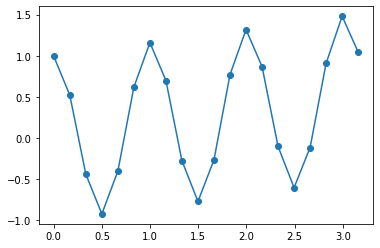

In [87]:
plt.scatter(x_values, y)
plt.plot(x_values, y)


In [99]:
list_M = [1,2,3,5,7,10]

def predict_normal(X, weights):
    return X @ weights

def Loss_normal(weights, X, y):
    return 1/2 * np.mean(np.square(predict(X, weights) - y))

def weights_normal(X,y):
    weights = np.linalg.pinv(X.T @ X) @ X.T @ y
    return weights


In [107]:
def X_W_list(X,y,list_M):
    X_list = []
    W_normal_list = []
    for M in list_M:
        X_copy = X.copy()
        m , n = X.shape
        X_copy = np.hstack((np.ones((m, 1)), X))
        for i in range(2,M+1):
            X_copy = np.hstack((X_copy, (X_copy[:, 1] ** i).reshape((m, 1))))
        X_copy[:, 1:] = (X_copy[:, 1:] - np.mean(X_copy[:, 1:], axis=0)) / np.std(X_copy[:, 1:], axis=0)
        X_list.append(X_copy)
#         print(X_copy)
        W_normal_list.append(weights_normal(X_copy,y))
        
    return X_list , W_normal_list
 


[array([0.32692306, 0.18999861]), array([ 0.32692306, -0.51640295,  0.73177549]), array([ 0.32692306, -0.47937734,  0.63338827,  0.06354753]), array([  0.32692306,  -6.93731187,  40.80270823, -86.16113601,
        76.87862716, -24.36694555]), array([ 3.26923064e-01, -1.73411642e+01,  2.03532443e+02, -9.79710667e+02,
        2.41983262e+03, -3.21391583e+03,  2.17693988e+03, -5.89158228e+02]), array([ 3.26923064e-01, -3.38924240e+00,  1.37097696e+02, -3.68731347e+03,
        3.46723902e+04, -1.58592113e+05,  4.07078882e+05, -6.18227355e+05,
        5.52164170e+05, -2.68300860e+05,  5.47586752e+04])]


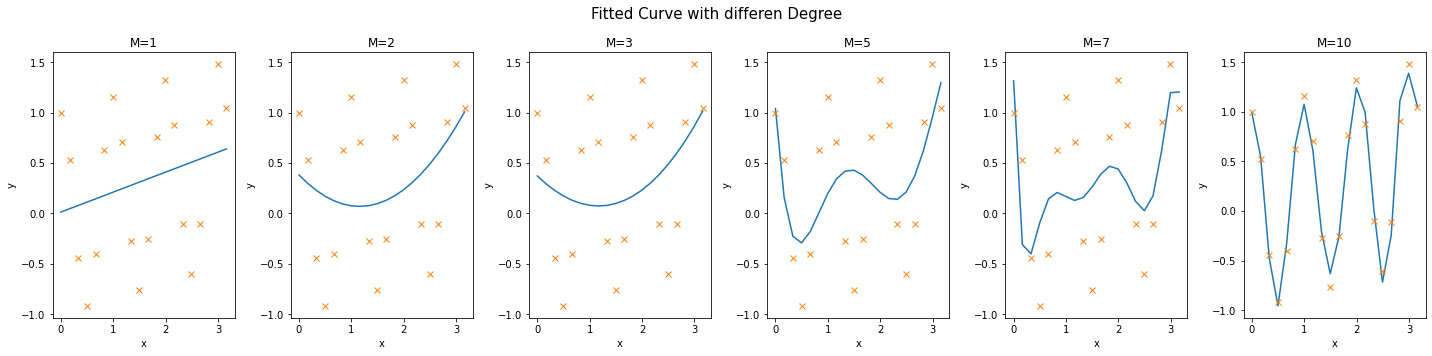

In [111]:
samples = 20
x_values , y = f_x(samples)
X = np.array([x_values]).T
y = np.array(y)

X_list , W_normal_list = X_W_list(X,y,list_M)     
print(W_normal_list)
prediction_list = []
for w , X in zip(W_normal_list,X_list):
    prediction_list.append(predict(X,w))
        
fig = plt.figure(figsize=(20, 5))
count = 1
fig.suptitle("Fitted Curve with differen Degree",fontsize=15)
for data,i in zip(prediction_list,list_M):
    ax = fig.add_subplot(1,len(list_M),count)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title("M="+str(i))
    ax.plot(x_values , data)
    ax.plot(x_values,y,'x')
    count +=1

plt.tight_layout()
plt.show()

[array([0.30140852, 0.21002672]), array([ 0.30140852, -0.38534212,  0.61527649]), array([ 0.30140852,  0.04238734, -0.49537426,  0.70668971]), array([  0.30140852,  -6.99336717,  39.09812172, -77.50859248,
        64.18300931, -18.52300078]), array([ 3.01408525e-01, -2.39538370e+01,  2.64546659e+02, -1.20575358e+03,
        2.83381307e+03, -3.59722298e+03,  2.33799398e+03, -6.09210307e+02]), array([ 3.01408525e-01, -1.17519407e+00,  6.32737085e+01, -2.68582786e+03,
        2.74203625e+04, -1.27997722e+05,  3.28898706e+05, -4.96031109e+05,
        4.38237580e+05, -2.10207617e+05,  4.23037698e+04])]


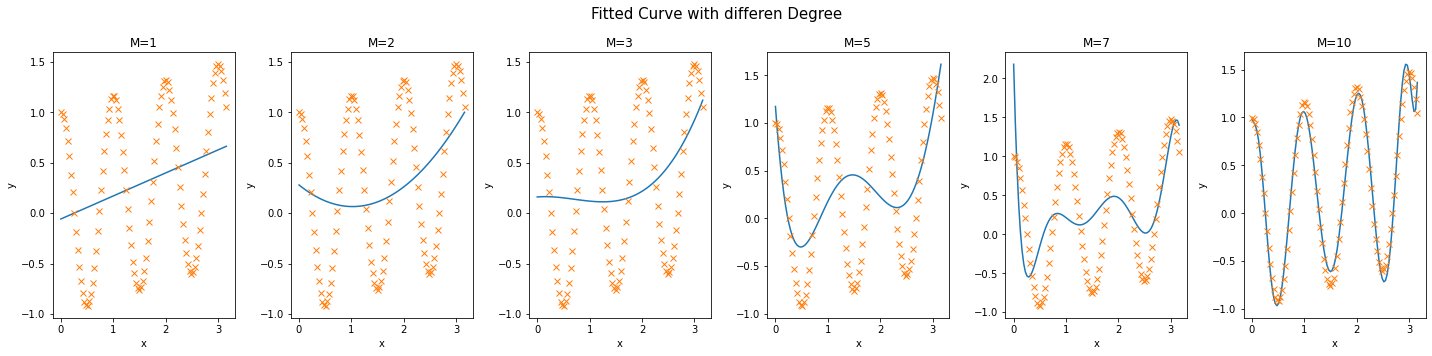

In [114]:
samples = 100
x_values , y = f_x(samples)
X = np.array([x_values]).T
y = np.array(y)

X_list , W_normal_list = X_W_list(X,y,list_M)     
print(W_normal_list)
prediction_list = []
for w , X in zip(W_normal_list,X_list):
    prediction_list.append(predict(X,w))
        
fig = plt.figure(figsize=(20, 5))
count = 1
fig.suptitle("Fitted Curve with differen Degree",fontsize=15)
for data,i in zip(prediction_list,list_M):
    ax = fig.add_subplot(1,len(list_M),count)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title("M="+str(i))
    ax.plot(x_values , data)
    ax.plot(x_values,y,'x')
    count +=1

plt.tight_layout()
plt.show()

[array([0.29539593, 0.21333787]), array([ 0.29539593, -0.35313519,  0.58512391]), array([ 0.29539593,  0.16585237, -0.75640595,  0.85099921]), array([  0.29539593,  -6.9528139 ,  38.44369212, -75.06636048,
        60.95280677, -17.11359175]), array([ 2.95395932e-01, -2.67487349e+01,  2.92242638e+02, -1.31802661e+03,
        3.06580861e+03, -3.85345433e+03,  2.48142741e+03, -6.41033335e+02]), array([ 2.95395932e-01, -1.70199497e+00,  8.05855821e+01, -2.87649839e+03,
        2.84155866e+04, -1.30790843e+05,  3.33257970e+05, -4.99588693e+05,
        4.39281551e+05, -2.09864378e+05,  4.20866683e+04])]


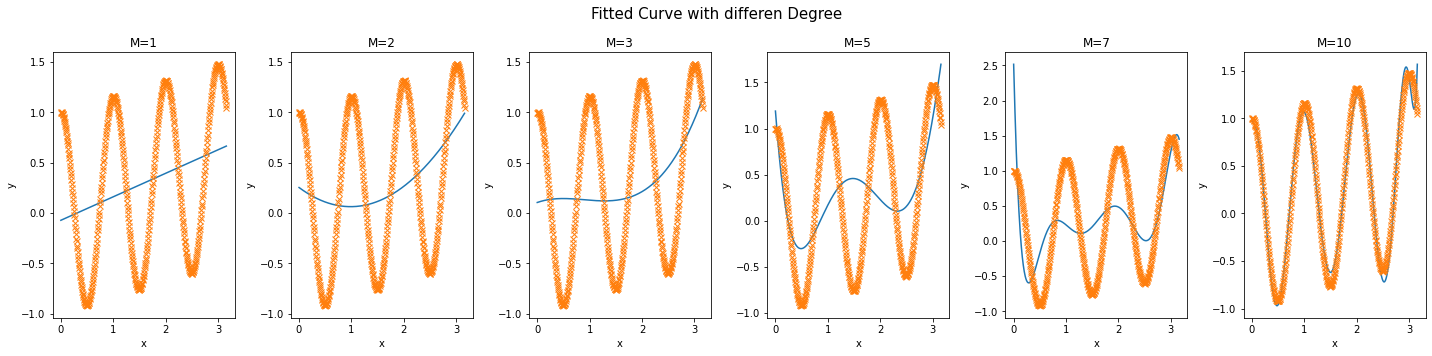

In [116]:
samples = 500
x_values , y = f_x(samples)
X = np.array([x_values]).T
y = np.array(y)

X_list , W_normal_list = X_W_list(X,y,list_M)     
# print(W_normal_list)
prediction_list = []
for w , X in zip(W_normal_list,X_list):
    prediction_list.append(predict(X,w))
        
fig = plt.figure(figsize=(20, 5))
count = 1
fig.suptitle("Fitted Curve with differen Degree",fontsize=15)
for data,i in zip(prediction_list,list_M):
    ax = fig.add_subplot(1,len(list_M),count)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title("M="+str(i))
    ax.plot(x_values , data)
    ax.plot(x_values,y,'x')
    count +=1

plt.tight_layout()
plt.show()

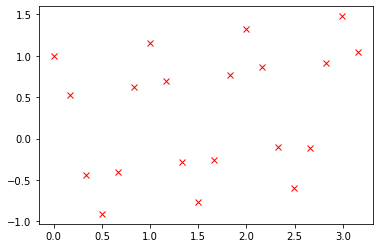

In [118]:
samples = 20
x_values , y = f_x(samples)
X = np.array([x_values]).T
y = np.array(y)
plt.plot(X, y, 'rx')

In [126]:
def predict(X, weights):
    return X @ weights

def Loss(weights, X, y):
    return 1/2 * np.mean(np.square(predict(X, weights) - y))

def PolyCurveFit(X,y , M,alpha = 0.0001,iteration=500,showloss=False):
    m , n = X.shape
    X = np.hstack((np.ones((m, 1)), X))
    for i in range(2,M+1):
        X = np.hstack((X, (X[:, 1] ** i).reshape((m, 1))))
    X[:, 1:] = (X[:, 1:] - np.mean(X[:, 1:], axis=0)) / np.std(X[:, 1:], axis=0)
#     X[:, 1:] = (X[:, 1:] - np.mean(X[:, 1:], axis=0))
    weights = np.ones(X.shape[1])
    weights = weights - alpha * (1/m) * (X.T @ ((X @ weights) - y))
    losses = []
    for _ in range(iteration):
        weights = weights - alpha * (1/m) * (X.T @ ((X @ weights) - y))
        if showloss == True:
            print(Loss(weights,X,y),end = "->")
        losses.append(Loss(weights, X, y))
    return X,weights,losses

# def PolyCurveFit_again(X,y ,M,weights,threshold = 0.2,alpha = 0.0001,iteration=500,showloss=False):
#     m , n = X.shape
#     X = np.hstack((np.ones((m, 1)), X))
#     for i in range(2,M+1):
#         X = np.hstack((X, (X[:, 1] ** i).reshape((m, 1))))
# #     X[:, 1:] = (X[:, 1:] - np.mean(X[:, 1:], axis=0)) / np.std(X[:, 1:], axis=0)
# #     X[:, 1:] = (X[:, 1:] - np.mean(X[:, 1:], axis=0))
# #     weights = np.ones(X.shape[1])
#     weights = weights - alpha * (1/m) * (X.T @ ((X @ weights) - y))
#     losses = []
#     while(Loss(weights, X, y)>threshold):
# #     for _ in range(iteration):
#         weights = weights - alpha * (1/m) * (X.T @ ((X @ weights) - y))
#         if showloss == True:
#             print(Loss(weights,X,y),end = "->")
#         losses.append(Loss(weights, X, y))
#     return X,weights,losses
    

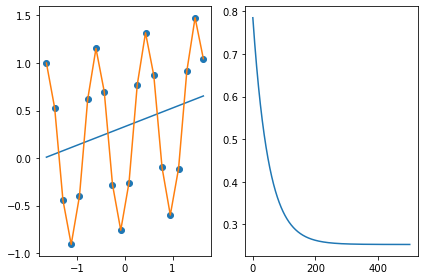

In [140]:
X_feature, weight_GD,losses = PolyCurveFit(X,y,1,alpha = 1e-2,iteration=500,showloss=False)
mypredictions = predict(X_feature, weight_GD)
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(X_feature[:, 1], mypredictions, label='predictions')
ax1.scatter(X_feature[:, 1], y)
ax1.plot(X_feature[:, 1], y)
ax2.plot([i for i in range(1,501)], losses)

plt.tight_layout()
plt.show()


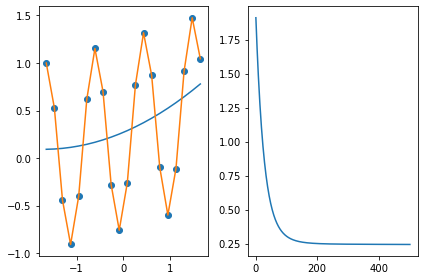

In [142]:
X_feature, weight_GD,losses = PolyCurveFit(X,y,2,alpha = 1e-2,iteration=500,showloss=False)
mypredictions = predict(X_feature, weight_GD)
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(X_feature[:, 1], mypredictions, label='predictions')
ax1.scatter(X_feature[:, 1], y)
ax1.plot(X_feature[:, 1], y)
ax2.plot([i for i in range(1,501)], losses)

plt.tight_layout()
plt.show()


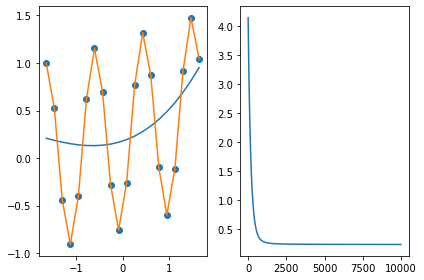

In [147]:
X_feature, weight_GD,losses = PolyCurveFit(X,y,3,alpha = 1e-3,iteration=10000,showloss=False)
mypredictions = predict(X_feature, weight_GD)
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(X_feature[:, 1], mypredictions, label='predictions')
ax1.scatter(X_feature[:, 1], y)
ax1.plot(X_feature[:, 1], y)
ax2.plot([i for i in range(1,10001)], losses)

plt.tight_layout()
plt.show()


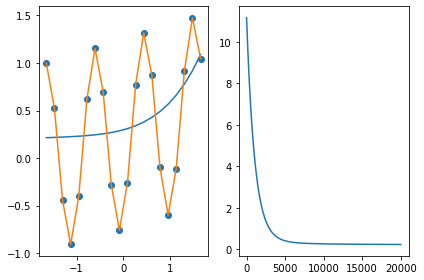

In [156]:
X_feature, weight_GD,losses = PolyCurveFit(X,y,5,alpha = 1e-4,iteration=20000,showloss=False)
mypredictions = predict(X_feature, weight_GD)
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(X_feature[:, 1], mypredictions, label='predictions')
ax1.scatter(X_feature[:, 1], y)
ax1.plot(X_feature[:, 1], y)
ax2.plot([i for i in range(1,20001)], losses)

plt.tight_layout()
plt.show()


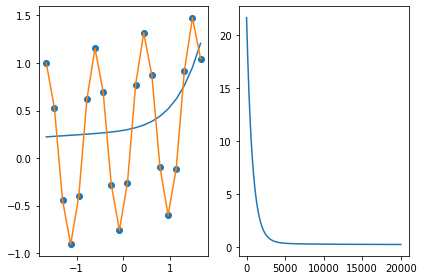

In [163]:
X_feature, weight_GD,losses = PolyCurveFit(X,y,7,alpha = 1e-4,iteration=20000,showloss=False)
mypredictions = predict(X_feature, weight_GD)
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(X_feature[:, 1], mypredictions, label='predictions')
ax1.scatter(X_feature[:, 1], y)
ax1.plot(X_feature[:, 1], y)
ax2.plot([i for i in range(1,20001)], losses)

plt.tight_layout()
plt.show()


23.727893419307463->17.416502505381693->12.801103812232919->9.42567053088093->6.956895340882809->5.1511297146864745->3.830242763197235->2.8639885447901334->2.157124171983519->1.639996790388529->1.2616640964082837->0.9848656994373656->0.7823468768099884->0.634170688711198->0.5257525252898564->0.44642278287668685->0.3883756729371851->0.34590037598009793->0.31481866906545825->0.2920735561176748->0.27542834094075097->0.2632464826128458->0.25433054175781167->0.24780435285199026->0.24302681850030666->0.23952883760198745->0.23696715828042722->0.23509061333326872->0.23371541522722988->0.23270707956238817->0.2319671983888198->0.23142376207474738->0.231024077625752->0.23072958683428962->0.23051207455604472->0.23035089416762872->0.2302309373210914->0.23014114832306637->0.23007343703504363->0.23002188338739865->0.22998215527992932->0.2299510826273301->0.22992634566372616->0.22990624685657796->0.22988954400216075->0.22987532809109573->0.22986293393476648->0.22985187476486005->0.22984179437553204->0

->0.22348926006759862->0.22348679411426992->0.223484329473971->0.22348186614527193->0.22347940412674464->0.22347694341696228->0.22347448401450007->0.22347202591793452->0.22346956912584393->0.22346711363680818->0.22346465944940883->0.22346220656222907->0.2234597549738536->0.22345730468286887->0.22345485568786283->0.22345240798742516->0.22344996158014707->0.2234475164646216->0.22344507263944294->0.2234426301032073->0.22344018885451228->0.22343774889195744->0.2234353102141434->0.22343287281967275->0.22343043670714963->0.2234280018751798->0.22342556832237032->0.22342313604733022->0.22342070504867->0.22341827532500175->0.22341584687493912->0.2234134196970973->0.22341099379009322->0.22340856915254514->0.22340614578307325->0.22340372368029904->0.2234013028428458->0.22339888326933796->0.22339646495840215->0.2233940479086661->0.22339163211875931->0.2233892175873128->0.2233868043129592->0.2233843922943326->0.2233819815300687->0.22337957201880485->0.22337716375918->0.22337475674983437->0.22337235

->0.2208281370569734->0.22082663979136727->0.22082514283316632->0.22082364618208938->0.2208221498378561->0.2208206538001861->0.2208191580687994->0.2208176626434164->0.22081616752375766->0.22081467270954436->0.22081317820049753->0.22081168399633921->0.22081019009679093->0.2208086965015751->0.2208072032104144->0.2208057102230315->0.2208042175391498->0.2208027251584926->0.22080123308078403->0.22079974130574792->0.22079824983310878->0.22079675866259155->0.22079526779392128->0.2207937772268232->0.2207922869610231->0.2207907969962469->0.22078930733222119->0.22078781796867233->0.2207863289053273->0.22078484014191352->0.2207833516781584->0.22078186351378987->0.22078037564853603->0.22077888808212554->0.2207774008142871->0.22077591384474976->0.22077442717324303->0.22077294079949658->0.22077145472324036->0.22076996894420486->0.22076848346212063->0.22076699827671856->0.22076551338772998->0.2207640287948865->0.22076254449791985->0.22076106049656224->0.22075957679054628->0.22075809337960434->0.22075

->0.21889334087922255->0.21889210504619877->0.21889086932038473->0.21888963370172423->0.21888839819016112->0.21888716278563933->0.21888592748810276->0.2188846922974955->0.21888345721376168->0.21888222223684534->0.21888098736669087->0.21887975260324244->0.2188785179464443->0.21887728339624107->0.21887604895257703->0.21887481461539676->0.21887358038464483->0.21887234626026605->0.21887111224220482->0.21886987833040603->0.2188686445248146->0.21886741082537528->0.218866177232033->0.21886494374473292->0.2188637103634199->0.21886247708803927->0.21886124391853592->0.2188600108548555->0.2188587778969428->0.2188575450447437->0.2188563122982033->0.21885507965726708->0.2188538471218806->0.21885261469198963->0.2188513823675396->0.21885015014847625->0.2188489180347455->0.21884768602629304->0.21884645412306486->0.2188452223250068->0.218843990632065->0.21884275904418532->0.2188415275613142->0.21884029618339745->0.21883906491038158->0.21883783374221272->0.21883660267883745->0.21883537172020198->0.21883

->0.2172050142541575->0.21720389563500514->0.21720277708133331->0.21720165859312934->0.21720054017037987->0.21719942181307195->0.21719830352119276->0.21719718529472912->0.21719606713366807->0.21719494903799652->0.21719383100770165->0.2171927130427705->0.21719159514319006->0.21719047730894753->0.21718935954002977->0.217188241836424->0.21718712419811737->0.21718600662509685->0.21718488911734965->0.21718377167486302->0.2171826542976238->0.21718153698561946->0.21718041973883703->0.21717930255726378->0.21717818544088674->0.2171770683896932->0.2171759514036705->0.21717483448280567->0.21717371762708604->0.21717260083649892->0.21717148411103154->0.21717036745067114->0.2171692508554049->0.2171681343252204->0.2171670178601047->0.21716590146004516->0.21716478512502926->0.21716366885504415->0.21716255265007733->0.21716143651011607->0.21716032043514785->0.21715920442515993->0.2171580884801399->0.2171569726000749->0.2171558567849526->0.21715474103476035->0.21715362534948546->0.2171525097291156->0.21

->0.21566747716823914->0.2156664428638464->0.21566540861380717->0.21566437441811676->0.2156633402767707->0.21566230618976417->0.21566127215709252->0.21566023817875135->0.21565920425473575->0.2156581703850411->0.21565713656966284->0.2156561028085963->0.2156550691018369->0.21565403544937983->0.21565300185122074->0.21565196830735486->0.21565093481777747->0.2156499013824842->0.21564886800147->0.21564783467473073->0.21564680140226145->0.21564576818405765->0.21564473502011489->0.21564370191042825->0.2156426688549935->0.21564163585380558->0.2156406029068602->0.21563957001415268->0.21563853717567844->0.21563750439143284->0.21563647166141134->0.21563543898560927->0.21563440636402215->0.21563337379664543->0.21563234128347433->0.2156313088245044->0.21563027641973104->0.21562924406914977->0.21562821177275585->0.21562717953054475->0.21562614734251198->0.2156251152086528->0.215624083128963->0.21562305110343766->0.2156220191320724->0.21562098721486267->0.21561995535180362->0.21561892354289122->0.2156

->0.2142881697236197->0.21428720684790808->0.2142862440215975->0.21428528124468532->0.2142843185171684->0.21428335583904395->0.214282393210309->0.21428143063096075->0.21428046810099607->0.21427950562041237->0.2142785431892064->0.2142775808073755->0.2142766184749167->0.21427565619182704->0.21427469395810372->0.21427373177374376->0.21427276963874425->0.2142718075531025->0.2142708455168152->0.2142698835298797->0.21426892159229322->0.2142679597040527->0.21426699786515516->0.2142660360755979->0.21426507433537792->0.2142641126444922->0.2142631510029381->0.21426218941071268->0.21426122786781293->0.21426026637423595->0.21425930492997894->0.21425834353503892->0.21425738218941298->0.21425642089309843->0.21425545964609208->0.21425449844839134->0.2142535372999931->0.21425257620089438->0.2142516151510927->0.21425065415058486->0.21424969319936799->0.2142487322974393->0.21424777144479581->0.21424681064143475->0.21424584988735323->0.21424488918254808->0.2142439285270168->0.21424296792075626->0.2142420

->0.21308795197416647->0.21308705047841636->0.2130861490286715->0.2130852476249295->0.21308434626718809->0.21308344495544457->0.2130825436896968->0.213081642469942->0.21308074129617802->0.2130798401684022->0.2130789390866122->0.2130780380508055->0.21307713706098->0.21307623611713283->0.21307533521926175->0.21307443436736437->0.2130735335614382->0.21307263280148087->0.2130717320874897->0.2130708314194624->0.21306993079739675->0.21306903022128992->0.21306812969113978->0.21306722920694382->0.21306632876869952->0.2130654283764047->0.21306452803005654->0.21306362772965287->0.21306272747519114->0.21306182726666906->0.21306092710408392->0.21306002698743357->0.21305912691671552->0.21305822689192716->0.2130573269130664->0.21305642698013041->0.213055527093117->0.21305462725202365->0.21305372745684803->0.2130528277075876->0.21305192800423992->0.21305102834680284->0.21305012873527343->0.21304922916964966->0.21304832964992898->0.21304743017610894->0.21304653074818708->0.213045631366161->0.213044732

->0.21181703113690925->0.21181619443753616->0.21181535778079427->0.21181452116668117->0.21181368459519484->0.2118128480663331->0.21181201158009372->0.2118111751364744->0.21181033873547306->0.21180950237708746->0.21180866606131538->0.2118078297881548->0.2118069935576033->0.21180615736965885->0.2118053212243191->0.21180448512158204->0.21180364906144522->0.21180281304390675->0.21180197706896423->0.21180114113661555->0.21180030524685836->0.2117994693996907->0.2117986335951103->0.21179779783311498->0.21179696211370244->0.21179612643687054->0.2117952908026172->0.21179445521093995->0.21179361966183685->0.21179278415530572->0.21179194869134438->0.2117911132699503->0.21179027789112173->0.21178944255485624->0.2117886072611516->0.2117877720100057->0.21178693680141633->0.21178610163538142->0.2117852665118988->0.21178443143096595->0.2117835963925808->0.21178276139674143->0.21178192644344543->0.2117810915326906->0.21178025666447478->0.21177942183879583->0.2117785870556514->0.2117777523150397->0.2117

->0.2106778505615071->0.21067707188816015->0.21067629325446666->0.2106755146604248->0.21067473610603252->0.2106739575912877->0.21067317911618838->0.2106724006807325->0.21067162228491795->0.21067084392874288->0.21067006561220508->0.2106692873353027->0.2106685090980335->0.21066773090039556->0.21066695274238692->0.21066617462400564->0.21066539654524932->0.21066461850611612->0.2106638405066042->0.2106630625467114->0.2106622846264355->0.21066150674577466->0.2106607289047268->0.2106599511032901->0.21065917334146214->0.21065839561924138->0.2106576179366252->0.21065684029361206->0.21065606269019965->0.21065528512638623->0.21065450760216944->0.21065373011754743->0.21065295267251813->0.21065217526707958->0.21065139790122975->0.21065062057496647->0.2106498432882879->0.21064906604119193->0.21064828883367648->0.21064751166573958->0.2106467345373792->0.21064595744859332->0.2106451803993799->0.21064440338973694->0.21064362641966242->0.21064284948915413->0.2106420725982104->0.21064129574682902->0.2106

0.20962345569738722->0.20962273070929646->0.2096220057581127->0.2096212808438342->0.2096205559664591->0.2096198311259853->0.20961910632241115->0.20961838155573442->0.20961765682595385->0.2096169321330668->0.20961620747707183->0.209615482857967->0.20961475827575055->0.20961403373042015->0.20961330922197444->0.20961258475041106->0.20961186031572857->0.20961113591792474->0.20961041155699797->0.2096096872329461->0.2096089629457672->0.20960823869545991->0.20960751448202175->0.20960679030545104->0.209606066165746->0.20960534206290463->0.209604617996925->0.20960389396780546->0.20960316997554415->0.20960244602013872->0.20960172210158748->0.2096009982198888->0.2096002743750407->0.20959955056704116->0.2095988267958883->0.20959810306158033->0.2095973793641154->0.20959665570349148->0.20959593207970686->0.20959520849275962->0.2095944849426477->0.2095937614293693->0.20959303795292264->0.20959231451330584->0.20959159111051684->0.2095908677445538->0.20959014441541504->0.2095894211230985->0.20958869786

->0.20861140230643288->0.20861072883076143->0.20861005538936314->0.2086093819822367->0.20860870860938024->0.2086080352707917->0.20860736196646984->0.20860668869641272->0.2086060154606184->0.20860534225908536->0.2086046690918118->0.20860399595879583->0.20860332286003586->0.2086026497955301->0.20860197676527642->0.20860130376927385->0.20860063080752006->0.20859995788001337->0.20859928498675234->0.20859861212773473->0.2085979393029592->0.20859726651242375->0.20859659375612666->0.2085959210340665->0.20859524834624116->0.20859457569264883->0.20859390307328823->0.20859323048815712->0.20859255793725393->0.20859188542057677->0.2085912129381243->0.20859054048989428->0.20858986807588525->0.20858919569609563->0.2085885233505233->0.2085878510391666->0.20858717876202376->0.20858650651909322->0.20858583431037309->0.20858516213586165->0.20858448999555718->0.20858381788945776->0.20858314581756185->0.2085824737798676->0.20858180177637334->0.2085811298070773->0.2085804578719776->0.20857978597107268->0.2

->0.20770131487206261->0.20770068770359446->0.20770006056703263->0.2076994334623755->0.2076988063896211->0.20769817934876836->0.20769755233981516->0.20769692536276013->0.20769629841760148->0.20769567150433782->0.20769504462296723->0.20769441777348852->0.20769379095589957->0.20769316417019884->0.20769253741638485->0.20769191069445606->0.20769128400441067->0.20769065734624706->0.20769003071996353->0.20768940412555872->0.20768877756303064->0.20768815103237798->0.20768752453359887->0.2076868980666918->0.2076862716316552->0.20768564522848743->0.20768501885718665->0.2076843925177514->0.20768376621018025->0.20768313993447102->0.20768251369062263->0.20768188747863311->0.20768126129850123->0.20768063515022472->0.20768000903380263->0.20767938294923285->0.20767875689651394->0.20767813087564427->0.20767750488662223->0.20767687892944622->0.20767625300411446->0.20767562711062532->0.20767500124897742->0.20767437541916892->0.20767374962119808->0.20767312385506376->0.2076724981207639->0.207671872418296

->0.20683278617222975->0.20683220318102458->0.20683162021946747->0.20683103728755686->0.20683045438529132->0.20682987151266902->0.20682928866968883->0.20682870585634916->0.20682812307264822->0.20682754031858477->0.2068269575941573->0.20682637489936423->0.20682579223420397->0.20682520959867484->0.20682462699277596->0.2068240444165052->0.20682346186986128->0.20682287935284255->0.20682229686544776->0.20682171440767502->0.2068211319795231->0.20682054958099044->0.20681996721207568->0.2068193848727769->0.20681880256309282->0.20681822028302208->0.2068176380325629->0.20681705581171395->0.20681647362047362->0.20681589145884036->0.20681530932681266->0.2068147272243892->0.2068141451515683->0.2068135631083483->0.2068129810947282->0.20681239911070595->0.20681181715628022->0.20681123523144923->0.20681065333621212->0.20681007147056701->0.20680948963451223->0.20680890782804653->0.20680832605116825->0.2068077443038759->0.20680716258616796->0.20680658089804305->0.2068059992394994->0.20680541761053567->0

->0.20603193055726327->0.20603138828587558->0.20603084604205463->0.20603030382579873->0.20602976163710643->0.20602921947597658->0.20602867734240768->0.20602813523639812->0.20602759315794655->0.2060270511070518->0.20602650908371248->0.2060259670879267->0.2060254251196935->0.2060248831790112->0.20602434126587865->0.20602379938029433->0.20602325752225664->0.20602271569176459->0.20602217388881647->0.20602163211341065->0.20602109036554653->0.2060205486452218->0.20602000695243539->0.20601946528718598->0.20601892364947227->0.20601838203929262->0.20601784045664565->0.20601729890152987->0.20601675737394443->0.2060162158738871->0.20601567440135699->0.20601513295635251->0.20601459153887247->0.20601405014891516->0.20601350878647948->0.20601296745156375->0.20601242614416665->0.20601188486428673->0.20601134361192272->0.2060108023870733->0.20601026118973692->0.2060097200199121->0.2060091788775972->0.20600863776279138->0.20600809667549286->0.20600755561570055->0.2060070145834128->0.206006473578628->0.

->0.2053583803135896->0.20535787227607258->0.205357364264372->0.2053568562784868->0.20535634831841548->0.20535584038415675->0.20535533247570945->0.20535482459307214->0.20535431673624344->0.20535380890522204->0.20535330110000677->0.20535279332059617->0.20535228556698884->0.20535177783918365->0.2053512701371792->0.20535076246097428->0.2053502548105676->0.20534974718595742->0.20534923958714296->0.20534873201412246->0.2053482244668947->0.2053477169454588->0.2053472094498129->0.20534670197995597->0.2053461945358866->0.20534568711760331->0.2053451797251052->0.20534467235839057->0.2053441650174582->0.2053436577023069->0.2053431504129351->0.20534264314934186->0.2053421359115255->0.20534162869948497->0.20534112151321876->0.2053406143527256->0.2053401072180041->0.20533960010905314->0.20533909302587144->0.20533858596845733->0.2053380789368097->0.20533757193092747->0.20533706495080878->0.20533655799645278->0.20533605106785785->0.2053355441650231->0.20533503728794664->0.20533453043662778->0.2053340

->0.20477984921262427->0.20477937056867854->0.20477889194904683->0.20477841335372773->0.20477793478272047->0.20477745623602348->0.20477697771363546->0.20477649921555557->0.20477602074178208->0.2047755422923141->0.2047750638671501->0.20477458546628902->0.20477410708972976->0.2047736287374708->0.20477315040951088->0.20477267210584893->0.2047721938264837->0.20477171557141371->0.20477123734063812->0.2047707591341553->0.20477028095196434->0.2047698027940638->0.20476932466045256->0.2047688465511291->0.2047683684660926->0.20476789040534152->0.20476741236887458->0.20476693435669083->0.20476645636878868->0.20476597840516705->0.20476550046582487->0.20476502255076068->0.2047645446599732->0.2047640667934616->0.20476358895122387->0.20476311113325946->0.20476263333956696->0.20476215557014504->0.20476167782499238->0.20476120010410792->0.20476072240749038->0.2047602447351383->0.20475976708705074->0.20475928946322625->0.2047588118636638->0.20475833428836215->0.2047578567373197->0.20475737921053563->0.2

->0.20418531558532366->0.20418486713613734->0.20418441870972162->0.20418397030607532->0.20418352192519723->0.20418307356708637->0.2041826252317415->0.2041821769191614->0.20418172862934486->0.2041812803622906->0.20418083211799787->0.2041803838964651->0.20417993569769144->0.2041794875216753->0.20417903936841597->0.20417859123791224->0.20417814313016264->0.20417769504516628->0.2041772469829219->0.20417679894342813->0.2041763509266842->0.20417590293268856->0.20417545496144068->0.20417500701293867->0.20417455908718166->0.20417411118416853->0.20417366330389797->0.20417321544636918->0.20417276761158037->0.20417231979953104->0.20417187201021955->0.20417142424364493->0.20417097649980617->0.20417052877870198->0.20417008108033108->0.20416963340469235->0.20416918575178472->0.2041687381216069->0.20416829051415797->0.20416784292943652->0.20416739536744152->0.20416694782817163->0.20416650031162584->0.20416605281780315->0.20416560534670208->0.20416515789832168->0.20416471047266066->0.20416426306971802

->0.203545084387814->0.2035446684388999->0.20354425251109523->0.2035438366043985->0.20354342071880907->0.20354300485432558->0.2035425890109471->0.20354217318867232->0.20354175738750063->0.2035413416074306->0.203540925848461->0.2035405101105912->0.20354009439381976->0.20353967869814565->0.2035392630235681->0.20353884737008582->0.20353843173769745->0.20353801612640252->0.20353760053619924->0.2035371849670869->0.20353676941906476->0.20353635389213115->0.2035359383862852->0.20353552290152604->0.20353510743785247->0.2035346919952632->0.20353427657375742->0.20353386117333394->0.20353344579399174->0.20353303043572954->0.20353261509854675->0.2035321997824417->0.20353178448741355->0.20353136921346132->0.2035309539605837->0.2035305387287801->0.20353012351804894->0.2035297083283893->0.20352929315980028->0.2035288780122805->0.20352846288582885->0.20352804778044473->0.20352763269612698->0.20352721763287387->0.2035268025906848->0.20352638756955882->0.2035259725694945->0.20352555759049124->0.20352514

->0.20300156413152876->0.2030011757591721->0.20300078740651503->0.2030003990735568->0.20300001076029583->0.20299962246673195->0.20299923419286356->0.20299884593868978->0.2029984577042093->0.2029980694894217->0.2029976812943255->0.20299729311892006->0.20299690496320424->0.20299651682717687->0.20299612871083714->0.20299574061418374->0.20299535253721618->0.20299496447993298->0.2029945764423334->0.20299418842441627->0.20299380042618081->0.20299341244762567->0.20299302448875034->0.20299263654955327->0.20299224863003365->0.2029918607301906->0.2029914728500231->0.20299108498952995->0.20299069714871068->0.2029903093275634->0.2029899215260878->0.20298953374428277->0.20298914598214698->0.20298875823967974->0.20298837051687996->0.20298798281374655->0.20298759513027864->0.20298720746647506->0.20298681982233502->0.20298643219785734->0.20298604459304087->0.20298565700788523->0.20298526944238873->0.20298488189655067->0.20298449437036997->0.20298410686384577->0.20298371937697685->0.2029833319097624->0

->0.20248899385823776->0.20248863147822888->0.2024882691165908->0.2024879067733228->0.20248754444842385->0.20248718214189307->0.20248681985372938->0.20248645758393252->0.20248609533250073->0.20248573309943318->0.2024853708847291->0.2024850086883878->0.20248464651040804->0.20248428435078894->0.20248392220952932->0.20248356008662896->0.20248319798208617->0.20248283589590016->0.20248247382807033->0.2024821117785954->0.20248174974747474->0.20248138773470728->0.2024810257402918->0.20248066376422766->0.20248030180651394->0.20247993986714957->0.20247957794613383->0.20247921604346533->0.20247885415914366->0.20247849229316764->0.20247813044553614->0.20247776861624867->0.20247740680530382->0.20247704501270092->0.20247668323843895->0.20247632148251724->0.20247595974493438->0.20247559802568965->0.2024752363247823->0.20247487464221123->0.20247451297797547->0.20247415133207403->0.20247378970450622->0.20247342809527086->0.20247306650436703->0.2024727049317938->0.20247234337755052->0.20247198184163584

->0.20198675326376714->0.20198641633723763->0.20198607942777796->0.20198574253538712->0.20198540566006468->0.2019850688018095->0.2019847319606205->0.20198439513649732->0.2019840583294387->0.20198372153944372->0.20198338476651165->0.2019830480106418->0.2019827112718331->0.2019823745500846->0.20198203784539542->0.20198170115776506->0.2019813644871921->0.20198102783367594->0.20198069119721604->0.20198035457781088->0.2019800179754601->0.20197968139016273->0.20197934482191746->0.20197900827072393->0.2019786717365813->0.20197833521948821->0.20197799871944416->0.20197766223644847->0.20197732577049962->0.2019769893215972->0.2019766528897405->0.20197631647492814->0.20197598007715944->0.20197564369643373->0.20197530733275007->0.20197497098610748->0.2019746346565051->0.20197429834394226->0.20197396204841772->0.201973625769931->0.20197328950848084->0.20197295326406656->0.20197261703668748->0.20197228082634253->0.20197194463303075->0.2019716084567514->0.2019712722975037->0.20197093615528652->0.2019

->0.20155591183307447->0.20155559672788775->0.20155528163865552->0.20155496656537691->0.201554651508051->0.20155433646667725->0.20155402144125484->0.20155370643178258->0.20155339143825982->0.20155307646068601->0.2015527614990599->0.2015524465533812->0.20155213162364866->0.20155181670986141->0.20155150181201914->0.20155118693012045->0.20155087206416514->0.2015505572141516->0.20155024238007963->0.2015499275619485->0.2015496127597569->0.20154929797350424->0.20154898320319004->0.20154866844881275->0.20154835371037208->0.20154803898786744->0.20154772428129752->0.20154740959066153->0.20154709491595907->0.20154678025718864->0.20154646561435005->0.20154615098744239->0.20154583637646467->0.20154552178141624->0.20154520720229593->0.2015448926391032->0.20154457809183746->0.20154426356049737->0.2015439490450826->0.20154363454559215->0.2015433200620252->0.20154300559438076->0.2015426911426584->0.20154237670685698->0.20154206228697563->0.20154174788301388->0.20154143349497072->0.20154111912284534->0

->0.20112151625024627->0.20112122313173897->0.20112093002806236->0.20112063693921547->0.20112034386519745->0.20112005080600825->0.2011197577616462->0.20111946473211098->0.20111917171740182->0.2011188787175179->0.20111858573245853->0.20111829276222282->0.20111799980681017->0.20111770686621955->0.20111741394045066->0.2011171210295025->0.20111682813337417->0.20111653525206474->0.20111624238557413->0.20111594953390108->0.20111565669704506->0.2011153638750051->0.20111507106778062->0.20111477827537078->0.20111448549777472->0.2011141927349919->0.2011138999870214->0.20111360725386257->0.20111331453551484->0.2011130218319767->0.20111272914324824->0.20111243646932842->0.2011121438102163->0.20111185116591143->0.20111155853641266->0.2011112659217195->0.20111097332183134->0.2011106807367471->0.2011103881664662->0.20111009561098778->0.2011098030703113->0.20110951054443568->0.20110921803336024->0.2011089255370845->0.20110863305560747->0.20110834058892837->0.20110804813704655->0.20110775569996148->0.2

->0.20074612863092622->0.2007458544988383->0.20074558038061047->0.20074530627624193->0.20074503218573203->0.20074475810907982->0.20074448404628495->0.2007442099973468->0.20074393596226395->0.2007436619410366->0.20074338793366345->0.20074311394014402->0.20074283996047768->0.20074256599466325->0.2007422920427009->0.20074201810458897->0.20074174418032714->0.2007414702699149->0.20074119637335155->0.20074092249063588->0.2007406486217675->0.20074037476674578->0.2007401009255701->0.20073982709823932->0.2007395532847533->0.20073927948511075->0.20073900569931147->0.20073873192735436->0.200738458169239->0.20073818442496444->0.20073791069453012->0.2007376369779355->0.2007373632751798->0.20073708958626177->0.20073681591118117->0.20073654224993734->0.20073626860252972->0.20073599496895717->0.2007357213492192->0.20073544774331514->0.20073517415124406->0.20073490057300547->0.20073462700859857->0.20073435345802304->0.20073407992127734->0.20073380639836155->0.20073353288927454->0.20073325939401582->0.2

->0.2003896664185869->0.20038941030230983->0.20038915419897183->0.2003888981085727->0.20038864203111065->0.2003883859665863->0.20038812991499827->0.20038787387634588->0.2003876178506287->0.2003873618378464->0.2003871058379977->0.2003868498510822->0.20038659387709915->0.20038633791604807->0.20038608196792818->0.20038582603273875->0.20038557011047922->0.20038531420114922->0.2003850583047472->0.20038480242127346->0.20038454655072702->0.20038429069310695->0.20038403484841266->0.20038377901664392->0.2003835231977999->0.20038326739187942->0.2003830115988825->0.20038275581880796->0.20038250005165548->0.20038224429742413->0.2003819885561136->0.20038173282772287->0.2003814771122515->0.20038122140969894->0.20038096572006442->0.20038071004334715->0.2003804543795465->0.20038019872866167->0.20037994309069243->0.20037968746563792->0.20037943185349705->0.2003791762542702->0.20037892066795554->0.20037866509455293->0.20037840953406194->0.2003781539864815->0.20037789845181103->0.20037764293005017->0.200

->0.20003823123734904->0.20003799286816606->0.2000377545110145->0.20003751616589457->0.2000372778328054->0.20003703951174642->0.2000368012027168->0.20003656290571628->0.20003632462074367->0.2000360863477991->0.20003584808688127->0.20003560983799015->0.20003537160112472->0.20003513337628434->0.200034895163469->0.20003465696267733->0.20003441877390885->0.20003418059716344->0.20003394243244->0.20003370427973838->0.20003346613905704->0.20003322801039647->0.20003298989375518->0.2000327517891332->0.2000325136965298->0.200032275615944->0.20003203754737564->0.20003179949082356->0.2000315614462878->0.20003132341376725->0.2000310853932612->0.20003084738476978->0.2000306093882917->0.2000303714038263->0.2000301334313737->0.2000298954709323->0.20002965752250232->0.2000294195860826->0.20002918166167277->0.20002894374927224->0.20002870584888024->0.20002846796049606->0.20002823008411968->0.20002799221974982->0.20002775436738637->0.20002751652702816->0.20002727869867484->0.2000270408823262->0.200026803

->0.19971446700141066->0.19971424496717133->0.19971402294412888->0.19971380093228297->0.1997135789316331->0.19971335694217823->0.19971313496391824->0.19971291299685226->0.19971269104097977->0.1997124690963005->0.19971224716281358->0.1997120252405184->0.19971180332941454->0.19971158142950124->0.19971135954077804->0.19971113766324458->0.19971091579689995->0.19971069394174373->0.1997104720977755->0.19971025026499437->0.19971002844339994->0.1997098066329915->0.199709584833769->0.1997093630457311->0.19970914126887773->0.1997089195032084->0.19970869774872202->0.19970847600541836->0.19970825427329691->0.19970803255235678->0.19970781084259784->0.19970758914401937->0.1997073674566206->0.19970714578040116->0.19970692411536028->0.19970670246149752->0.1997064808188125->0.19970625918730417->0.19970603756697228->0.19970581595781653->0.1997055943598358->0.19970537277302977->0.19970515119739785->0.19970492963293937->0.19970470807965418->0.199704486537541->0.19970426500659996->0.19970404348682994->0.19

0.19941598329953264->0.1994157763102795->0.1994155693314539->0.19941536236305585->0.19941515540508464->0.1994149484575397->0.19941474152042105->0.19941453459372724->0.19941432767745815->0.1994141207716134->0.19941391387619234->0.1994137069911946->0.19941350011661899->0.19941329325246565->0.19941308639873417->0.1994128795554233->0.199412672722533->0.19941246590006295->0.19941225908801213->0.1994120522863802->0.19941184549516672->0.19941163871437068->0.1994114319439921->0.19941122518403043->0.199411018434485->0.19941081169535513->0.19941060496664048->0.19941039824834061->0.19941019154045422->0.19940998484298217->0.1994097781559227->0.19940957147927568->0.19940936481304067->0.19940915815721746->0.19940895151180477->0.19940874487680255->0.19940853825221025->0.19940833163802701->0.19940812503425287->0.19940791844088654->0.1994077118579281->0.1994075052853771->0.19940729872323248->0.19940709217149383->0.19940688563016112->0.19940667909923335->0.19940647257870994->0.19940626606859052->0.19940

->0.1991321225962719->0.1991319299001094->0.1991317372136437->0.1991315445368749->0.19913135186980277->0.19913115921242613->0.19913096656474497->0.1991307739267587->0.19913058129846659->0.19913038867986874->0.199130196070964->0.19913000347175216->0.19912981088223258->0.19912961830240522->0.19912942573226894->0.19912923317182368->0.1991290406210689->0.19912884808000397->0.1991286555486282->0.19912846302694143->0.19912827051494336->0.19912807801263308->0.19912788552001015->0.19912769303707412->0.19912750056382458->0.199127308100261->0.19912711564638283->0.19912692320218947->0.19912673076768098->0.19912653834285626->0.19912634592771478->0.1991261535222565->0.1991259611264808->0.1991257687403865->0.19912557636397415->0.19912538399724278->0.1991251916401919->0.19912499929282096->0.19912480695512963->0.19912461462711717->0.19912442230878322->0.19912423000012747->0.19912403770114911->0.1991238454118478->0.19912365313222308->0.19912346086227428->0.19912326860200139->0.1991230763514031->0.19912

0.1988739578836301->0.1988737781722672->0.19887359846993763->0.19887341877664125->0.19887323909237759->0.19887305941714606->0.1988728797509462->0.19887270009377783->0.19887252044564013->0.19887234080653285->0.1988721611764555->0.19887198155540756->0.19887180194338896->0.19887162234039862->0.19887144274643603->0.19887126316150125->0.1988710835855938->0.19887090401871302->0.1988707244608585->0.19887054491202946->0.19887036537222583->0.19887018584144706->0.1988700063196926->0.19886982680696205->0.1988696473032554->0.19886946780857112->0.19886928832290954->0.19886910884627024->0.19886892937865255->0.19886874992005577->0.19886857047047973->0.19886839102992374->0.19886821159838783->0.1988680321758712->0.1988678527623733->0.19886767335789376->0.19886749396243236->0.19886731457598816->0.19886713519856097->0.19886695583015052->0.19886677647075596->0.1988665971203772->0.19886641777901332->0.198866238446664->0.19886605912332928->0.1988658798090082->0.1988657005037007->0.19886552120740592->0.19886

->0.19863519195004548->0.19863502423372673->0.1986348565258283->0.19863468882634977->0.19863452113529093->0.1986343534526513->0.19863418577843056->0.19863401811262807->0.19863385045524326->0.19863368280627608->0.19863351516572608->0.19863334753359235->0.1986331799098749->0.198633012294573->0.19863284468768683->0.19863267708921548->0.1986325094991583->0.1986323419175153->0.19863217434428576->0.19863200677946963->0.1986318392230661->0.1986316716750746->0.19863150413549518->0.19863133660432727->0.19863116908157036->0.1986310015672237->0.19863083406128756->0.1986306665637609->0.19863049907464378->0.19863033159393534->0.19863016412163556->0.19862999665774356->0.1986298292022592->0.19862966175518174->0.19862949431651106->0.19862932688624674->0.19862915946438833->0.19862899205093534->0.19862882464588724->0.19862865724924375->0.19862848986100445->0.19862832248116885->0.1986281551097362->0.19862798774670687->0.19862782039207946->0.19862765304585447->0.19862748570803085->0.19862731837860848->0.1

->0.1984039116439537->0.1984037555318125->0.19840359942749858->0.19840344333101168->0.19840328724235107->0.19840313116151692->0.1984029750885081->0.19840281902332485->0.19840266296596656->0.19840250691643257->0.19840235087472255->0.1984021948408366->0.19840203881477375->0.19840188279653365->0.19840172678611634->0.19840157078352116->0.19840141478874768->0.19840125880179543->0.1984011028226642->0.19840094685135334->0.19840079088786255->0.19840063493219193->0.19840047898434013->0.19840032304430738->0.19840016711209324->0.198400011187697->0.19839985527111875->0.19839969936235768->0.19839954346141342->0.19839938756828582->0.1983992316829744->0.1983990758054785->0.19839891993579808->0.1983987640739328->0.19839860821988173->0.19839845237364478->0.1983982965352216->0.1983981407046116->0.1983979848818147->0.1983978290668303->0.19839767325965793->0.1983975174602975->0.19839736166874827->0.19839720588500992->0.19839705010908204->0.19839689434096427->0.1983967385806565->0.19839658282815817->0.1983

0.1981890589792791->0.19818891363206512->0.19818876829212814->0.19818862295946776->0.19818847763408384->0.19818833231597563->0.19818818700514312->0.19818804170158572->0.19818789640530335->0.19818775111629536->0.19818760583456135->0.19818746056010134->0.1981873152929142->0.19818717003300038->0.19818702478035904->0.19818687953498987->0.19818673429689265->0.19818658906606698->0.19818644384251233->0.19818629862622844->0.19818615341721496->0.19818600821547155->0.19818586302099775->0.19818571783379277->0.19818557265385703->0.19818542748118967->0.19818528231579075->0.19818513715765923->0.19818499200679535->0.19818484686319843->0.19818470172686797->0.198184556597804->0.1981844114760058->0.19818426636147343->0.198184121254206->0.19818397615420327->0.19818383106146506->0.19818368597599098->0.19818354089778045->0.19818339582683328->0.1981832507631492->0.19818310570672745->0.19818296065756824->0.19818281561567036->0.19818267058103428->0.19818252555365937->0.19818238053354476->0.19818223552069061->

->0.19799104224881486->0.19799090680823972->0.19799077137443466->0.1979906359474001->0.19799050052713557->0.1979903651136406->0.1979902297069149->0.1979900943069583->0.19798995891377008->0.19798982352735048->0.19798968814769843->0.19798955277481414->0.1979894174086972->0.19798928204934668->0.19798914669676312->0.1979890113509455->0.1979888760118938->0.19798874067960748->0.19798860535408647->0.19798847003533024->0.19798833472333843->0.19798819941811077->0.1979880641196468->0.19798792882794639->0.19798779354300883->0.19798765826483386->0.19798752299342162->0.1979873877287714->0.1979872524708826->0.19798711721975543->0.1979869819753889->0.1979868467377834->0.19798671150693803->0.19798657628285268->0.19798644106552704->0.1979863058549604->0.19798617065115293->0.19798603545410387->0.19798590026381296->0.19798576508028023->0.19798562990350468->0.19798549473348653->0.1979853595702253->0.1979852244137204->0.1979850892639718->0.1979849541209789->0.1979848189847416->0.1979846838552593->0.1979845

->0.19780335824659567->0.19780323218068974->0.19780310612107538->0.19780298006775232->0.19780285402071987->0.19780272797997783->0.19780260194552649->0.19780247591736463->0.19780234989549256->0.19780222387990978->0.19780209787061565->0.19780197186761028->0.19780184587089317->0.19780171988046377->0.19780159389632238->0.19780146791846817->0.19780134194690097->0.1978012159816203->0.19780109002262625->0.19780096406991787->0.19780083812349558->0.19780071218335848->0.1978005862495063->0.19780046032193926->0.1978003344006563->0.19780020848565746->0.19780008257694243->0.19779995667451084->0.19779983077836255->0.19779970488849685->0.19779957900491385->0.19779945312761288->0.19779932725659385->0.19779920139185656->0.19779907553339993->0.19779894968122474->0.19779882383532962->0.19779869799571528->0.1977985721623805->0.19779844633532523->0.19779832051454965->0.1977981947000526->0.19779806889183468->0.1977979430898945->0.19779781729423282->0.19779769150484877->0.19779756572174184->0.197797439944911

->0.19763511791684726->0.1976350002401283->0.19763488256927236->0.1976347649042788->0.19763464724514684->0.197634529591877->0.1976344119444688->0.19763429430292132->0.19763417666723487->0.19763405903740927->0.19763394141344373->0.1976338237953384->0.19763370618309253->0.19763358857670618->0.19763347097617887->0.1976333533815104->0.1976332357927002->0.19763311820974824->0.1976330006326543->0.19763288306141802->0.19763276549603895->0.1976326479365167->0.1976325303828514->0.19763241283504232->0.1976322952930893->0.19763217775699216->0.19763206022675045->0.19763194270236417->0.19763182518383265->0.19763170767115554->0.1976315901643328->0.19763147266336417->0.19763135516824895->0.1976312376789876->0.19763112019557902->0.1976310027180234->0.19763088524632022->0.19763076778046923->0.19763065032046984->0.19763053286632268->0.19763041541802626->0.1976302979755813->0.19763018053898668->0.19763006310824255->0.19762994568334855->0.19762982826430445->0.19762971085110986->0.19762959344376457->0.1976

0.19747509959343312->0.19747498988152254->0.19747488017506748->0.1974747704740681->0.19747466077852352->0.1974745510884335->0.19747444140379816->0.19747433172461698->0.19747422205088988->0.19747411238261606->0.19747400271979548->0.19747389306242824->0.19747378341051358->0.19747367376405162->0.19747356412304165->0.19747345448748377->0.19747334485737744->0.1974732352327227->0.19747312561351893->0.19747301599976588->0.19747290639146337->0.19747279678861124->0.19747268719120928->0.19747257759925682->0.19747246801275364->0.1974723584316997->0.19747224885609493->0.19747213928593838->0.1974720297212304->0.19747192016197032->0.19747181060815805->0.19747170105979334->0.19747159151687568->0.19747148197940495->0.197471372447381->0.19747126292080333->0.1974711533996717->0.19747104388398587->0.19747093437374572->0.19747082486895046->0.19747071536960073->0.19747060587569548->0.19747049638723452->0.19747038690421773->0.19747027742664494->0.1974701679545156->0.19747005848782967->0.19746994902658652->0

->0.19732293730289216->0.19732283514981586->0.19732273300180925->0.19732263085887114->0.19732252872100203->0.19732242658820107->0.19732232446046832->0.19732222233780358->0.19732212022020656->0.1973220181076769->0.19732191600021393->0.19732181389781836->0.19732171180048913->0.19732160970822654->0.19732150762102965->0.19732140553889882->0.19732130346183333->0.19732120138983364->0.1973210993228984->0.19732099726102836->0.19732089520422275->0.19732079315248158->0.19732069110580414->0.1973205890641905->0.19732048702764024->0.19732038499615345->0.1973202829697298->0.19732018094836862->0.19732007893206982->0.19731997692083353->0.19731987491465905->0.19731977291354624->0.19731967091749483->0.1973195689265047->0.19731946694057512->0.1973193649597068->0.1973192629838983->0.1973191610131502->0.19731905904746186->0.1973189570868334->0.19731885513126443->0.1973187531807541->0.1973186512353025->0.19731854929490988->0.19731844735957568->0.19731834542929913->0.19731824350408073->0.19731814158391975->0

->0.1971990242664428->0.19719892825658586->0.1971988322514842->0.19719873625113732->0.1971986402555453->0.19719854426470754->0.19719844827862412->0.19719835229729457->0.1971982563207188->0.19719816034889665->0.1971980643818278->0.19719796841951173->0.1971978724619486->0.1971977765091379->0.19719768056107947->0.1971975846177732->0.19719748867921855->0.19719739274541564->0.19719729681636364->0.19719720089206288->0.19719710497251325->0.19719700905771398->0.19719691314766497->0.1971968172423661->0.19719672134181715->0.19719662544601763->0.19719652955496766->0.19719643366866654->0.1971963377871148->0.19719624191031135->0.19719614603825622->0.1971960501709495->0.1971959543083905->0.19719585845057913->0.1971957625975151->0.1971956667491985->0.19719557090562867->0.19719547506680565->0.19719537923272915->0.1971952834033988->0.19719518757881405->0.19719509175897532->0.1971949959438823->0.1971949001335343->0.1971948043279313->0.19719470852707294->0.197194612730959->0.19719451693958984->0.19719442

->0.1970798505513698->0.1970797604379189->0.19707967032892154->0.19707958022437777->0.19707949012428744->0.1970794000286502->0.1970793099374657->0.19707921985073434->0.19707912976845518->0.1970790396906282->0.19707894961725328->0.1970788595483299->0.19707876948385808->0.19707867942383772->0.1970785893682681->0.19707849931715->0.19707840927048173->0.19707831922826413->0.19707822919049695->0.19707813915717937->0.19707804912831167->0.19707795910389353->0.1970778690839246->0.1970777790684044->0.19707768905733355->0.19707759905071076->0.19707750904853674->0.19707741905081036->0.19707732905753242->0.19707723906870175->0.1970771490843185->0.1970770591043826->0.19707696912889366->0.19707687915785144->0.19707678919125587->0.19707669922910642->0.197076609271403->0.19707651931814557->0.19707642936933362->0.19707633942496752->0.19707624948504585->0.19707615954956975->0.19707606961853794->0.19707597969195076->0.1970758897698078->0.19707579985210893->0.1970757099388538->0.19707562003004236->0.197075

->0.19695938153340947->0.19695929736704462->0.19695921320482973->0.19695912904676433->0.19695904489284802->0.19695896074308133->0.19695887659746375->0.19695879245599454->0.19695870831867393->0.19695862418550206->0.1969585400564779->0.19695845593160208->0.19695837181087336->0.19695828769429274->0.19695820358185895->0.19695811947357242->0.1969580353694328->0.19695795126943977->0.1969578671735931->0.1969577830818929->0.19695769899433843->0.19695761491092983->0.19695753083166695->0.19695744675654933->0.19695736268557684->0.19695727861874934->0.19695719455606667->0.19695711049752826->0.19695702644313443->0.19695694239288478->0.19695685834677865->0.19695677430481656->0.19695669026699753->0.1969566062333222->0.19695652220378984->0.19695643817840025->0.19695635415715318->0.19695627014004874->0.19695618612708615->0.1969561021182659->0.19695601811358715->0.19695593411305007->0.1969558501166544->0.19695576612439997->0.19695568213628617->0.19695559815231337->0.19695551417248064->0.1969554301967885

->0.19684481055791686->0.19684473203321204->0.19684465351236863->0.19684457499538627->0.19684449648226518->0.1968444179730048->0.1968443394676054->0.19684426096606628->0.19684418246838764->0.19684410397456867->0.19684402548461016->0.19684394699851085->0.19684386851627123->0.1968437900378906->0.19684371156336938->0.1968436330927072->0.19684355462590358->0.196843476162958->0.19684339770387135->0.19684331924864268->0.19684324079727183->0.1968431623497585->0.19684308390610292->0.19684300546630473->0.19684292703036377->0.19684284859827914->0.19684277017005167->0.1968426917456809->0.19684261332516606->0.1968425349085075->0.1968424564957052->0.19684237808675834->0.196842299681667->0.19684222128043102->0.1968421428830503->0.19684206448952446->0.1968419860998532->0.1968419077140369->0.1968418293320747->0.19684175095396686->0.19684167257971263->0.19684159420931255->0.19684151584276574->0.19684143748007268->0.19684135912123246->0.19684128076624552->0.19684120241511122->0.19684112406782928->0.1968

0.19674076991153328->0.19674069649618545->0.19674062308443818->0.19674054967629082->0.1967404762717434->0.19674040287079583->0.1967403294734478->0.1967402560796994->0.19674018268954974->0.19674010930299943->0.19674003592004785->0.19673996254069498->0.1967398891649405->0.19673981579278443->0.19673974242422604->0.1967396690592661->0.19673959569790364->0.19673952234013875->0.19673944898597126->0.19673937563540103->0.19673930228842756->0.19673922894505105->0.19673915560527128->0.19673908226908787->0.19673900893650056->0.19673893560750963->0.19673886228211432->0.19673878896031474->0.19673871564211082->0.19673864232750235->0.1967385690164888->0.19673849570907057->0.19673842240524697->0.19673834910501775->0.19673827580838296->0.19673820251534274->0.19673812922589634->0.19673805594004384->0.19673798265778503->0.1967379093791199->0.19673783610404788->0.19673776283256908->0.19673768956468324->0.19673761630039024->0.19673754303968966->0.19673746978258166->0.19673739652906586->0.196737323279142->0

->0.19663780312327614->0.1966377347497694->0.19663766637960545->0.19663759801278377->0.19663752964930403->0.1966374612891671->0.19663739293237154->0.1966373245789181->0.19663725622880604->0.1966371878820355->0.1966371195386059->0.19663705119851776->0.19663698286177034->0.19663691452836363->0.19663684619829758->0.1966367778715719->0.19663670954818643->0.1966366412281408->0.19663657291143527->0.19663650459806933->0.19663643628804317->0.19663636798135609->0.19663629967800816->0.19663623137799938->0.19663616308132964->0.1966360947879982->0.1966360264980056->0.19663595821135132->0.19663588992803507->0.1966358216480567->0.1966357533714165->0.19663568509811385->0.1966356168281485->0.19663554856152063->0.19663548029823003->0.19663541203827611->0.1966353437816591->0.19663527552837862->0.1966352072784348->0.19663513903182725->0.19663507078855563->0.19663500254862->0.1966349343120204->0.1966348660787562->0.19663479784882762->0.19663472962223394->0.19663466139897567->0.19663459317905232->0.1966345

->0.19654566024391368->0.19654559636798793->0.19654553249517512->0.19654546862547467->0.19654540475888635->0.1965453408954107->0.1965452770350467->0.1965452131777949->0.19654514932365516->0.1965450854726267->0.19654502162470977->0.19654495777990416->0.19654489393820954->0.19654483009962603->0.19654476626415335->0.1965447024317915->0.19654463860253948->0.19654457477639847->0.1965445109533673->0.19654444713344618->0.19654438331663543->0.1965443195029337->0.19654425569234207->0.19654419188485941->0.1965441280804861->0.1965440642792219->0.1965440004810666->0.19654393668601983->0.19654387289408198->0.19654380910525254->0.19654374531953134->0.19654368153691815->0.19654361775741308->0.19654355398101545->0.19654349020772585->0.19654342643754355->0.19654336267046874->0.19654329890650096->0.19654323514564->0.19654317138788605->0.1965431076332389->0.19654304388169813->0.19654298013326396->0.19654291638793578->0.19654285264571386->0.19654278890659757->0.19654272517058727->0.19654266143768248->0.19

->0.19645944962485548->0.19645938994299736->0.19645933026403747->0.19645927058797583->0.19645921091481205->0.19645915124454633->0.19645909157717867->0.19645903191270842->0.19645897225113526->0.1964589125924599->0.19645885293668144->0.19645879328380017->0.19645873363381558->0.19645867398672795->0.19645861434253684->0.19645855470124238->0.1964584950628439->0.19645843542734162->0.19645837579473546->0.19645831616502488->0.19645825653821022->0.19645819691429117->0.19645813729326717->0.19645807767513865->0.19645801805990537->0.19645795844756697->0.19645789883812328->0.19645783923157403->0.1964577796279198->0.19645772002715975->0.19645766042929363->0.1964576008343219->0.19645754124224407->0.19645748165305993->0.19645742206676947->0.19645736248337242->0.19645730290286859->0.196457243325258->0.1964571837505406->0.19645712417871583->0.19645706460978407->0.19645700504374478->0.19645694548059794->0.19645688592034333->0.19645682636298117->0.19645676680851065->0.19645670725693215->0.1964566477082452

->0.19637610453674317->0.19637604889488752->0.19637599325572397->0.19637593761925182->0.19637588198547168->0.19637582635438272->0.19637577072598505->0.19637571510027854->0.19637565947726324->0.19637560385693875->0.19637554823930498->0.1963754926243622->0.19637543701210966->0.19637538140254757->0.19637532579567538->0.19637527019149353->0.1963752145900015->0.19637515899119945->0.19637510339508704->0.1963750478016641->0.19637499221093058->0.19637493662288635->0.1963748810375313->0.196374825454865->0.1963747698748878->0.19637471429759926->0.19637465872299933->0.1963746031510875->0.19637454758186443->0.1963744920153291->0.19637443645148223->0.19637438089032275->0.19637432533185115->0.19637426977606745->0.19637421422297097->0.19637415867256208->0.1963741031248401->0.19637404757980526->0.19637399203745767->0.19637393649779636->0.19637388096082173->0.19637382542653406->0.19637376989493222->0.19637371436601686->0.19637365883978783->0.19637360331624457->0.1963735477953871->0.1963734922772152->0.

->0.1963075624198815->0.19630751008819275->0.1963074577590266->0.19630740543238312->0.1963073531082621->0.1963073007866633->0.19630724846758663->0.19630719615103204->0.19630714383699935->0.1963070915254886->0.19630703921649947->0.19630698691003176->0.19630693460608536->0.1963068823046606->0.19630683000575658->0.19630677770937363->0.1963067254155115->0.19630667312417022->0.1963066208353498->0.19630656854904957->0.19630651626526985->0.1963064639840104->0.19630641170527105->0.1963063594290516->0.19630630715535202->0.19630625488417225->0.19630620261551202->0.19630615034937113->0.19630609808574964->0.19630604582464753->0.19630599356606432->0.19630594131000006->0.1963058890564547->0.19630583680542796->0.1963057845569198->0.19630573231093026->0.1963056800674587->0.19630562782650526->0.1963055755880704->0.19630552335215298->0.1963054711187538->0.19630541888787195->0.19630536665950743->0.19630531443366062->0.1963052622103312->0.19630520998951873->0.1963051577712232->0.19630510555544506->0.19630

->0.19623700430669416->0.19623695536936125->0.1962369064343775->0.1962368575017428->0.1962368085714572->0.19623675964352036->0.19623671071793222->0.19623666179469276->0.1962366128738018->0.19623656395525912->0.19623651503906478->0.19623646612521842->0.19623641721372004->0.19623636830456956->0.19623631939776706->0.19623627049331183->0.19623622159120463->0.1962361726914444->0.19623612379403152->0.19623607489896586->0.19623602600624723->0.19623597711587565->0.1962359282278508->0.19623587934217251->0.19623583045884074->0.1962357815778557->0.19623573269921663->0.19623568382292383->0.1962356349489774->0.19623558607737676->0.1962355372081221->0.19623548834121268->0.1962354394766494->0.19623539061443124->0.19623534175455873->0.19623529289703118->0.19623524404184903->0.19623519518901175->0.19623514633851927->0.19623509749037157->0.1962350486445687->0.19623499980111028->0.19623495095999616->0.1962349021212262->0.19623485328480067->0.19623480445071903->0.19623475561898135->0.19623470678958768->0.

->0.19616653770212694->0.19616649213957843->0.19616644657920648->0.1961664010210114->0.19616635546499236->0.19616630991115003->0.19616626435948362->0.19616621880999396->0.19616617326267988->0.19616612771754177->0.19616608217457984->0.19616603663379326->0.19616599109518235->0.19616594555874697->0.1961659000244871->0.1961658544924023->0.19616580896249297->0.19616576343475847->0.1961657179091988->0.19616567238581412->0.19616562686460404->0.19616558134556852->0.19616553582870766->0.19616549031402122->0.19616544480150866->0.1961653992911708->0.19616535378300654->0.19616530827701664->0.19616526277320015->0.19616521727155758->0.19616517177208861->0.19616512627479302->0.19616508077967093->0.1961650352867221->0.19616498979594624->0.1961649443073437->0.1961648988209141->0.19616485333665723->0.19616480785457296->0.1961647623746615->0.19616471689692233->0.19616467142135557->0.19616462594796116->0.19616458047673907->0.19616453500768866->0.19616448954081053->0.19616444407610406->0.19616439861356944-

->0.196105130323633->0.1961050876879009->0.19610504505419607->0.19610500242251833->0.19610495979286716->0.19610491716524323->0.19610487453964606->0.19610483191607503->0.19610478929453068->0.19610474667501304->0.19610470405752126->0.1961046614420559->0.19610461882861663->0.19610457621720334->0.19610453360781605->0.19610449100045446->0.19610444839511848->0.19610440579180816->0.19610436319052305->0.19610432059126368->0.1961042779940293->0.19610423539882021->0.19610419280563635->0.19610415021447727->0.19610410762534292->0.19610406503823336->0.19610402245314848->0.19610397987008824->0.19610393728905234->0.19610389471004067->0.19610385213305356->0.19610380955809034->0.19610376698515117->0.1961037244142359->0.19610368184534469->0.19610363927847702->0.19610359671363273->0.19610355415081213->0.1961035115900151->0.1961034690312413->0.1961034264744903->0.19610338391976287->0.19610334136705804->0.19610329881637664->0.19610325626771752->0.19610321372108125->0.1961031711764677->0.19610312863387636->

->0.1960453466840097->0.19604530688329522->0.19604526708446296->0.1960452272875128->0.19604518749244468->0.19604514769925854->0.19604510790795435->0.19604506811853198->0.1960450283309909->0.19604498854533178->0.19604494876155384->0.19604490897965712->0.19604486919964206->0.19604482942150805->0.19604478964525524->0.19604474987088297->0.19604471009839197->0.1960446703277819->0.19604463055905236->0.19604459079220332->0.19604455102723484->0.19604451126414685->0.19604447150293905->0.19604443174361158->0.19604439198616413->0.19604435223059674->0.19604431247690918->0.1960442727251015->0.19604423297517387->0.19604419322712546->0.19604415348095666->0.19604411373666752->0.1960440739942575->0.19604403425372713->0.1960439945150755->0.19604395477830291->0.1960439150434095->0.19604387531039508->0.19604383557925914->0.19604379585000192->0.19604375612262354->0.19604371639712348->0.19604367667350203->0.19604363695175847->0.19604359723189335->0.19604355751390623->0.1960435177977971->0.1960434780835661->

->0.19599023445598399->0.1959901972544263->0.19599016005461825->0.19599012285655923->0.19599008566024936->0.19599004846568896->0.19599001127287738->0.1959899740818148->0.19598993689250083->0.1959898997049361->0.19598986251911973->0.19598982533505205->0.19598978815273285->0.19598975097216226->0.19598971379333974->0.19598967661626543->0.19598963944093956->0.19598960226736145->0.1959895650955315->0.1959895279254494->0.195989490757115->0.1959894535905285->0.19598941642568923->0.1959893792625978->0.1959893421012538->0.19598930494165695->0.1959892677838077->0.19598923062770526->0.1959891934733501->0.19598915632074168->0.19598911916988024->0.1959890820207658->0.19598904487339802->0.1959890077277768->0.19598897058390224->0.19598893344177376->0.19598889630139193->0.1959888591627565->0.19598882202586698->0.19598878489072363->0.19598874775732647->0.19598871062567513->0.19598867349576954->0.19598863636760983->0.19598859924119583->0.19598856211652688->0.19598852499360395->0.19598848787242634->0.195

->0.1959371823335079->0.1959371476191381->0.19593711290639076->0.1959370781952658->0.19593704348576285->0.19593700877788184->0.19593697407162297->0.1959369393669857->0.19593690466397046->0.19593686996257675->0.1959368352628051->0.19593680056465437->0.19593676586812542->0.195936731173218->0.19593669647993156->0.19593666178826644->0.19593662709822243->0.1959365924097996->0.19593655772299753->0.19593652303781656->0.19593648835425645->0.1959364536723166->0.19593641899199765->0.19593638431329938->0.19593634963622117->0.19593631496076344->0.19593628028692633->0.1959362456147094->0.19593621094411248->0.19593617627513565->0.1959361416077785->0.1959361069420418->0.19593607227792448->0.19593603761542697->0.1959360029545489->0.19593596829529084->0.1959359336376519->0.19593589898163244->0.19593586432723248->0.19593582967445144->0.19593579502328953->0.195935760373747->0.1959357257258228->0.1959356910795182->0.19593565643483216->0.19593562179176488->0.19593558715031614->0.19593555251048575->0.195935

->0.19589094730394957->0.1958909147437068->0.19589088218497577->0.1958908496277569->0.19589081707205->0.1958907845178555->0.19589075196517222->0.19589071941400119->0.1958906868643417->0.19589065431619396->0.1958906217695579->0.19589058922443328->0.19589055668082006->0.19589052413871816->0.1958904915981276->0.19589045905904817->0.1958904265214798->0.1958903939854225->0.19589036145087624->0.19589032891784078->0.19589029638631644->0.1958902638563023->0.19589023132779923->0.19589019880080638->0.19589016627532457->0.1958901337513524->0.1958901012288913->0.19589006870794015->0.19589003618849937->0.1958900036705684->0.19588997115414766->0.1958899386392366->0.19588990612583596->0.19588987361394478->0.1958898411035635->0.19588980859469163->0.19588977608732933->0.19588974358147657->0.1958897110771336->0.19588967857429956->0.19588964607297493->0.19588961357315945->0.19588958107485294->0.19588954857805552->0.19588951608276745->0.1958894835889878->0.19588945109671724->0.1958894186059552->0.19588938

->0.1958454982476055->0.1958454677909974->0.19584543733579457->0.19584540688199598->0.195845376429602->0.1958453459786127->0.19584531552902754->0.19584528508084686->0.19584525463407043->0.19584522418869807->0.19584519374473003->0.19584516330216592->0.19584513286100563->0.1958451024212494->0.1958450719828971->0.19584504154594837->0.19584501111040337->0.1958449806762622->0.19584495024352436->0.19584491981219002->0.19584488938225922->0.19584485895373144->0.195844828526607->0.19584479810088598->0.19584476767656792->0.19584473725365287->0.19584470683214078->0.1958446764120316->0.19584464599332535->0.19584461557602195->0.19584458516012068->0.19584455474562276->0.19584452433252672->0.19584449392083353->0.19584446351054255->0.19584443310165417->0.19584440269416797->0.19584437228808385->0.19584434188340177->0.1958443114801218->0.19584428107824398->0.19584425067776767->0.19584422027869358->0.19584418988102098->0.19584415948474992->0.19584412908988075->0.19584409869641295->0.1958440683043469->0.1

->0.1958042881110939->0.19580425954847444->0.19580423098716335->0.19580420242715962->0.19580417386846424->0.19580414531107604->0.19580411675499565->0.1958040882002229->0.19580405964675757->0.19580403109459968->0.19580400254374922->0.1958039739942057->0.19580394544596982->0.19580391689904103->0.1958038883534192->0.1958038598091044->0.19580383126609702->0.1958038027243958->0.1958037741840018->0.1958037456449147->0.19580371710713396->0.19580368857066024->0.1958036600354927->0.19580363150163194->0.19580360296907756->0.19580357443782953->0.19580354590788765->0.19580351737925214->0.19580348885192286->0.19580346032589951->0.19580343180118226->0.1958034032777708->0.19580337475566562->0.19580334623486578->0.1958033177153722->0.1958032891971841->0.19580326068030174->0.19580323216472462->0.19580320365045334->0.1958031751374872->0.19580314662582682->0.1958031181154712->0.19580308960642104->0.1958030610986763->0.19580303259223636->0.1958030040871016->0.19580297558327187->0.1958029470807468->0.19580

->0.19576619476249063->0.19576616793776735->0.19576614111426285->0.1957661142919775->0.19576608747091107->0.1957660606510638->0.19576603383243502->0.19576600701502517->0.19576598019883387->0.1957659533838614->0.19576592657010772->0.19576589975757233->0.19576587294625553->0.195765846136157->0.1957658193272765->0.19576579251961493->0.19576576571317128->0.19576573890794566->0.1957657121039384->0.19576568530114916->0.19576565849957767->0.19576563169922417->0.19576560490008837->0.1957655781021704->0.1957655513054704->0.19576552450998777->0.1957654977157229->0.1957654709226754->0.19576544413084543->0.19576541734023298->0.19576539055083772->0.1957653637626598->0.19576533697569923->0.19576531018995563->0.19576528340542942->0.1957652566221198->0.19576522984002745->0.19576520305915213->0.19576517627949344->0.19576514950105134->0.19576512272382646->0.19576509594781807->0.19576506917302594->0.19576504239945053->0.19576501562709187->0.19576498885594948->0.19576496208602318->0.19576493531731337->0.1

0.19572890039415808->0.1957288752573965->0.19572885012176802->0.19572882498727182->0.19572879985390876->0.1957287747216782->0.19572874959058062->0.19572872446061496->0.19572869933178214->0.1957286742040815->0.1957286490775136->0.1957286239520775->0.19572859882777405->0.19572857370460267->0.1957285485825636->0.1957285234616562->0.1957284983418812->0.19572847322323794->0.19572844810572682->0.19572842298934723->0.1957283978740997->0.19572837275998384->0.19572834764699953->0.19572832253514688->0.19572829742442593->0.1957282723148363->0.195728247206378->0.19572822209905144->0.19572819699285599->0.19572817188779193->0.19572814678385894->0.19572812168105705->0.1957280965793863->0.1957280714788468->0.19572804637943794->0.19572802128116018->0.19572799618401338->0.19572797108799722->0.19572794599311188->0.19572792089935734->0.19572789580673325->0.19572787071523995->0.19572784562487694->0.19572782053564444->0.19572779544754243->0.19572777036057057->0.19572774527472916->0.19572772019001822->0.1957

->0.1956945799371443->0.19569455634046892->0.19569453274484752->0.19569450915028055->0.19569448555676722->0.19569446196430784->0.19569443837290257->0.1956944147825514->0.19569439119325338->0.19569436760500963->0.19569434401781952->0.195694320431683->0.19569429684659975->0.19569427326257033->0.19569424967959448->0.19569422609767217->0.19569420251680275->0.19569417893698698->0.19569415535822465->0.19569413178051512->0.19569410820385874->0.195694084628256->0.1956940610537061->0.19569403748020892->0.1956940139077649->0.19569399033637339->0.19569396676603523->0.19569394319674988->0.19569391962851707->0.19569389606133672->0.19569387249520934->0.1956938489301343->0.19569382536611196->0.19569380180314194->0.1956937782412242->0.19569375468035904->0.19569373112054622->0.19569370756178545->0.19569368400407683->0.19569366044742043->0.19569363689181635->0.19569361333726393->0.1956935897837637->0.1956935662313155->0.19569354267991904->0.1956935191295743->0.19569349558028132->0.1956934720320404->0.19

->0.1956619322940785->0.19566191014912593->0.19566188800515336->0.19566186586216033->0.1956618437201476->0.19566182157911444->0.19566179943906098->0.1956617772999873->0.19566175516189305->0.1956617330247789->0.19566171088864392->0.19566168875348833->0.19566166661931247->0.19566164448611587->0.19566162235389856->0.1956616002226606->0.19566157809240206->0.1956615559631229->0.19566153383482204->0.19566151170750098->0.19566148958115864->0.19566146745579555->0.19566144533141155->0.195661423208006->0.19566140108557956->0.1956613789641315->0.19566135684366256->0.19566133472417255->0.19566131260566058->0.19566129048812783->0.19566126837157333->0.19566124625599718->0.1956612241413999->0.19566120202778056->0.19566117991513982->0.19566115780347731->0.19566113569279306->0.19566111358308672->0.19566109147435887->0.19566106936660915->0.19566104725983732->0.19566102515404354->0.19566100304922782->0.1956609809453897->0.1956609588425295->0.19566093674064708->0.1956609146397426->0.19566089253981575->0.1

->0.19563161678173163->0.19563159597175792->0.19563157516269647->0.1956315543545463->0.19563153354730808->0.19563151274098106->0.19563149193556587->0.19563147113106194->0.19563145032746979->0.19563142952478876->0.1956314087230193->0.19563138792216087->0.19563136712221382->0.19563134632317813->0.19563132552505352->0.19563130472783993->0.19563128393153775->0.19563126313614632->0.1956312423416659->0.19563122154809648->0.195631200755438->0.1956311799636902->0.19563115917285323->0.19563113838292723->0.19563111759391177->0.195631096805807->0.19563107601861277->0.19563105523232932->0.195631034446956->0.19563101366249344->0.19563099287894128->0.19563097209629962->0.1956309513145682->0.19563093053374708->0.19563090975383604->0.19563088897483533->0.1956308681967447->0.19563084741956432->0.19563082664329365->0.19563080586793333->0.1956307850934829->0.19563076431994267->0.19563074354731155->0.19563072277559077->0.19563070200477964->0.1956306812348783->0.19563066046588665->0.19563063969780486->0.19

->0.1956025918734245->0.19560257232838965->0.19560255278420202->0.19560253324086133->0.19560251369836762->0.19560249415672087->0.19560247461592134->0.19560245507596832->0.19560243553686238->0.19560241599860295->0.19560239646119051->0.19560237692462487->0.19560235738890583->0.19560233785403286->0.19560231832000702->0.19560229878682794->0.19560227925449492->0.19560225972300824->0.1956022401923683->0.1956022206625747->0.1956022011336272->0.19560218160552614->0.19560216207827116->0.19560214255186253->0.19560212302629984->0.1956021035015836->0.19560208397771298->0.19560206445468892->0.1956020449325106->0.19560202541117783->0.1956020058906915->0.19560198637105056->0.19560196685225575->0.19560194733430641->0.19560192781720293->0.19560190830094543->0.19560188878553314->0.19560186927096632->0.1956018497572453->0.1956018302443699->0.19560181073233987->0.1956017912211551->0.19560177171081572->0.19560175220132164->0.19560173269267295->0.19560171318486946->0.1956016936779112->0.1956016741717979->0.

->0.1955760021811614->0.19557598378224342->0.19557596538411384->0.1955759469867728->0.19557592859022013->0.19557591019445575->0.19557589179947996->0.19557587340529245->0.19557585501189328->0.1955758366192823->0.19557581822745967->0.19557579983642487->0.1955757814461785->0.19557576305672023->0.19557574466805->0.19557572628016762->0.19557570789307338->0.19557568950676693->0.19557567112124835->0.19557565273651784->0.19557563435257494->0.19557561596941997->0.19557559758705267->0.1955755792054732->0.195575560824681->0.1955755424446765->0.19557552406545972->0.19557550568703064->0.19557548730938865->0.19557546893253422->0.19557545055646758->0.195575432181188->0.19557541380669569->0.19557539543299068->0.19557537706007302->0.19557535868794257->0.19557534031659898->0.19557532194604293->0.19557530357627367->0.19557528520729178->0.19557526683909673->0.19557524847168853->0.19557523010506742->0.1955752117392332->0.19557519337418566->0.19557517500992483->0.19557515664645092->0.19557513828376397->0.19

->0.19555033968807814->0.19555032238244602->0.19555030507754645->0.19555028777337938->0.19555027046994547->0.19555025316724367->0.19555023586527429->0.19555021856403768->0.1955502012635336->0.19555018396376164->0.1955501666647222->0.19555014936641532->0.1955501320688402->0.1955501147719977->0.19555009747588753->0.19555008018050918->0.19555006288586319->0.1955500455919495->0.1955500282987677->0.19555001100631778->0.1955499937146->0.1955499764236141->0.19554995913336032->0.19554994184383828->0.1955499245550484->0.19554990726699018->0.19554988997966338->0.19554987269306862->0.19554985540720557->0.19554983812207433->0.19554982083767447->0.19554980355400625->0.19554978627106953->0.19554976898886425->0.19554975170739058->0.19554973442664828->0.19554971714663763->0.1955496998673582->0.1955496825888101->0.19554966531099302->0.1955496480339075->0.1955496307575534->0.1955496134819302->0.1955495962070381->0.195549578932877->0.19554956165944748->0.19554954438674851->0.19554952711478057->0.19554950

->0.19552658417130206->0.19552656786515918->0.19552655155969803->0.19552653525491825->0.19552651895082016->0.1955265026474037->0.1955264863446685->0.19552647004261492->0.1955264537412425->0.19552643744055165->0.1955264211405418->0.19552640484121384->0.19552638854256657->0.19552637224460082->0.1955263559473162->0.195526339650713->0.19552632335479064->0.19552630705954926->0.19552629076498898->0.19552627447110987->0.19552625817791167->0.19552624188539436->0.19552622559355815->0.19552620930240283->0.1955261930119281->0.1955261767221341->0.19552616043302123->0.19552614414458874->0.19552612785683726->0.1955261115697663->0.1955260952833761->0.1955260789976663->0.19552606271263703->0.19552604642828852->0.19552603014462056->0.1955260138616327->0.19552599757932543->0.19552598129769888->0.1955259650167524->0.19552594873648615->0.19552593245690036->0.19552591617799464->0.19552589989976943->0.19552588362222428->0.19552586734535934->0.1955258510691741->0.19552583479366914->0.1955258185188445->0.1955

->0.1955039615454561->0.19550394617864944->0.19550393081247677->0.19550391544693752->0.19550390008203183->0.19550388471775962->0.1955038693541208->0.19550385399111564->0.1955038386287436->0.19550382326700547->0.19550380790590013->0.19550379254542838->0.19550377718559->0.1955037618263848->0.19550374646781304->0.1955037311098742->0.1955037157525687->0.19550370039589618->0.195503685039857->0.1955036696844505->0.19550365432967737->0.19550363897553708->0.19550362362202986->0.19550360826915533->0.1955035929169141->0.19550357756530568->0.19550356221432977->0.1955035468639868->0.19550353151427696->0.19550351616519956->0.19550350081675488->0.19550348546894275->0.19550347012176356->0.19550345477521658->0.1955034394293026->0.19550342408402097->0.19550340873937178->0.19550339339535544->0.1955033780519711->0.19550336270921959->0.19550334736710023->0.19550333202561282->0.19550331668475837->0.19550330134453603->0.1955032860049461->0.19550327066598833->0.19550325532766277->0.19550323998996907->0.19550

->0.19548306851736355->0.1954830540060737->0.19548303949537366->0.19548302498526357->0.1954830104757429->0.19548299596681254->0.19548298145847154->0.1954829669507207->0.19548295244355957->0.19548293793698798->0.19548292343100598->0.19548290892561365->0.19548289442081113->0.19548287991659802->0.19548286541297472->0.1954828509099407->0.1954828364074962->0.19548282190564092->0.19548280740437562->0.195482792903699->0.19548277840361244->0.19548276390411504->0.1954827494052069->0.19548273490688797->0.19548272040915818->0.19548270591201783->0.1954826914154666->0.1954826769195046->0.19548266242413143->0.19548264792934752->0.1954826334351527->0.1954826189415469->0.19548260444853038->0.19548258995610227->0.19548257546426376->0.19548256097301375->0.1954825464823527->0.19548253199228052->0.19548251750279733->0.19548250301390277->0.19548248852559702->0.19548247403788->0.1954824595507516->0.1954824450642118->0.1954824305782611->0.19548241609289868->0.19548240160812466->0.19548238712393942->0.1954823

->0.19546330318643507->0.19546328947274832->0.19546327575961037->0.19546326204702144->0.19546324833498174->0.1954632346234914->0.19546322091254956->0.19546320720215707->0.19546319349231372->0.19546317978301928->0.19546316607427358->0.19546315236607675->0.19546313865842874->0.19546312495132995->0.19546311124477972->0.19546309753877839->0.19546308383332608->0.19546307012842218->0.19546305642406697->0.1954630427202604->0.1954630290170027->0.19546301531429336->0.1954630016121331->0.19546298791052094->0.19546297420945766->0.1954629605089429->0.19546294680897663->0.19546293310955834->0.19546291941068913->0.19546290571236796->0.1954628920145952->0.1954628783173708->0.1954628646206949->0.19546285092456708->0.19546283722898755->0.19546282353395644->0.19546280983947348->0.19546279614553858->0.19546278245215198->0.19546276875931343->0.19546275506702296->0.1954627413752808->0.19546272768408654->0.19546271399343995->0.19546270030334167->0.1954626866137915->0.19546267292478897->0.19546265923633455->

->0.19544435694666867->0.19544434398571323->0.19544433102526884->0.19544431806533494->0.19544430510591188->0.1954442921469994->0.19544427918859744->0.19544426623070607->0.1954442532733252->0.1954442403164551->0.19544422736009542->0.19544421440424609->0.19544420144890726->0.1954441884940789->0.19544417553976123->0.19544416258595326->0.19544414963265616->0.19544413667986918->0.1954441237275925->0.19544411077582627->0.19544409782457006->0.19544408487382423->0.19544407192358854->0.19544405897386297->0.19544404602464754->0.19544403307594238->0.195444020127747->0.1954440071800618->0.1954439942328872->0.19544398128622198->0.19544396834006672->0.19544395539442158->0.19544394244928637->0.1954439295046612->0.19544391656054555->0.19544390361694014->0.19544389067384424->0.19544387773125832->0.19544386478918216->0.19544385184761548->0.19544383890655898->0.19544382596601173->0.19544381302597455->0.19544380008644668->0.19544378714742877->0.19544377420892028->0.19544376127092122->0.19544374833343203->

->0.1954267491429576->0.19542673687014775->0.19542672459781382->0.19542671232595507->0.19542670005457205->0.19542668778366462->0.19542667551323245->0.1954266632432757->0.19542665097379447->0.19542663870478832->0.19542662643625788->0.1954266141682029->0.19542660190062305->0.19542658963351828->0.195426577366889->0.19542656510073492->0.19542655283505608->0.19542654056985279->0.1954265283051239->0.19542651604087086->0.1954265037770926->0.1954264915137894->0.1954264792509616->0.19542646698860872->0.19542645472673068->0.19542644246532795->0.1954264302043997->0.19542641794394694->0.19542640568396877->0.19542639342446558->0.19542638116543745->0.1954263689068839->0.1954263566488053->0.19542634439120146->0.19542633213407276->0.19542631987741826->0.1954263076212389->0.19542629536553416->0.19542628311030397->0.1954262708555487->0.1954262586012678->0.1954262463474617->0.19542623409413015->0.1954262218412731->0.19542620958889048->0.19542619733698266->0.19542618508554913->0.19542617283459016->0.19542

->0.19541053420642973->0.19541052255667127->0.19541051090735675->0.19541049925848603->0.19541048761005886->0.1954104759620751->0.19541046431453543->0.19541045266743906->0.19541044102078642->0.19541042937457734->0.195410417728812->0.19541040608348972->0.19541039443861136->0.19541038279417616->0.19541037115018464->0.19541035950663677->0.19541034786353187->0.19541033622087062->0.19541032457865298->0.19541031293687822->0.19541030129554715->0.195410289654659->0.1954102780142145->0.19541026637421313->0.19541025473465484->0.1954102430955401->0.19541023145686848->0.19541021981863982->0.19541020818085436->0.19541019654351235->0.19541018490661294->0.19541017327015703->0.19541016163414388->0.1954101499985738->0.19541013836344695->0.19541012672876304->0.19541011509452177->0.19541010346072385->0.19541009182736865->0.19541008019445644->0.19541006856198728->0.19541005692996055->0.19541004529837666->0.1954100336672358->0.19541002203653784->0.1954100104062824->0.1954099987764697->0.19540998714710003->0

->0.19539504701809157->0.19539503595300273->0.19539502488832808->0.19539501382406724->0.1953950027602202->0.19539499169678715->0.19539498063376728->0.19539496957116148->0.19539495850896965->0.1953949474471916->0.1953949363858268->0.19539492532487615->0.19539491426433891->0.1953949032042154->0.19539489214450548->0.19539488108520917->0.1953948700263263->0.19539485896785702->0.19539484790980152->0.19539483685215947->0.19539482579493084->0.19539481473811554->0.19539480368171386->0.1953947926257255->0.1953947815701507->0.1953947705149893->0.195394759460241->0.19539474840590662->0.19539473735198473->0.19539472629847668->0.1953947152453819->0.1953947041927004->0.19539469314043195->0.19539468208857688->0.1953946710371349->0.19539465998610622->0.19539464893549052->0.19539463788528816->0.19539462683549874->0.19539461578612255->0.19539460473715925->0.19539459368860917->0.19539458264047194->0.19539457159274828->0.19539456054543697->0.19539454949853877->0.1953945384520537->0.19539452740598134->0.19

->0.1953796682012697->0.19537965770578616->0.1953796472106872->0.1953796367159733->0.19537962622164398->0.19537961572769963->0.19537960523413928->0.1953795947409642->0.19537958424817356->0.19537957375576784->0.19537956326374642->0.19537955277210958->0.19537954228085758->0.1953795317899901->0.19537952129950723->0.1953795108094089->0.19537950031969503->0.19537948983036552->0.19537947934142058->0.19537946885285995->0.1953794583646838->0.1953794478768922->0.19537943738948493->0.19537942690246185->0.19537941641582332->0.19537940592956915->0.19537939544369926->0.19537938495821353->0.19537937447311207->0.19537936398839537->0.1953793535040623->0.1953793430201137->0.19537933253654918->0.19537932205336908->0.19537931157057278->0.19537930108816076->0.19537929060613302->0.1953792801244892->0.19537926964322944->0.19537925916235382->0.195379248681862->0.1953792382017548->0.19537922772203084->0.1953792172426911->0.1953792067637357->0.195379196285164->0.19537918580697594->0.19537917532917232->0.195379

->0.1953651430891347->0.19536513312071496->0.19536512315265353->0.1953651131849497->0.19536510321760378->0.19536509325061563->0.1953650832839854->0.19536507331771258->0.19536506335179807->0.19536505338624072->0.19536504342104133->0.19536503345619943->0.19536502349171572->0.1953650135275893->0.1953650035638205->0.1953649936004095->0.1953649836373559->0.19536497367466005->0.1953649637123218->0.19536495375034102->0.195364943788718->0.1953649338274524->0.1953649238665443->0.19536491390599364->0.19536490394580036->0.19536489398596477->0.19536488402648627->0.19536487406736533->0.19536486410860177->0.1953648541501957->0.19536484419214678->0.19536483423445547->0.19536482427712112->0.19536481432014455->0.19536480436352494->0.1953647944072623->0.19536478445135746->0.19536477449580983->0.19536476454061907->0.19536475458578556->0.1953647446313094->0.19536473467719026->0.1953647247234285->0.1953647147700232->0.19536470481697565->0.19536469486428504->0.19536468491195141->0.1953646749599751->0.195364

->0.19535156751041954->0.19535155802420257->0.19535154853831868->0.19535153905276817->0.19535152956755075->0.19535152008266646->0.19535151059811534->0.19535150111389746->0.19535149163001292->0.1953514821464612->0.19535147266324265->0.19535146318035745->0.195351453697805->0.19535144421558553->0.19535143473369926->0.19535142525214622->0.19535141577092613->0.1953514062900387->0.19535139680948438->0.19535138732926302->0.19535137784937479->0.1953513683698194->0.19535135889059696->0.19535134941170718->0.1953513399331502->0.1953513304549263->0.1953513209770354->0.195351311499477->0.19535130202225154->0.19535129254535852->0.19535128306879873->0.19535127359257193->0.19535126411667708->0.19535125464111527->0.19535124516588656->0.19535123569099017->0.1953512262164263->0.19535121674219552->0.19535120726829708->0.19535119779473092->0.19535118832149792->0.19535117884859743->0.19535116937602912->0.1953511599037936->0.19535115043189072->0.19535114096032025->0.1953511314890825->0.19535112201817686->0.1

->0.19533857841534458->0.19533856938032393->0.195338560345613->0.1953385513112127->0.19533854227712233->0.19533853324334224->0.19533852420987202->0.19533851517671252->0.19533850614386247->0.19533849711132295->0.19533848807909338->0.19533847904717377->0.1953384700155642->0.19533846098426438->0.19533845195327523->0.1953384429225959->0.19533843389222658->0.19533842486216696->0.19533841583241718->0.19533840680297757->0.19533839777384798->0.19533838874502812->0.19533837971651818->0.19533837068831822->0.19533836166042778->0.19533835263284766->0.19533834360557706->0.19533833457861643->0.19533832555196556->0.1953383165256243->0.19533830749959286->0.19533829847387135->0.1953382894484594->0.19533828042335694->0.1953382713985647->0.19533826237408194->0.19533825334990867->0.19533824432604513->0.19533823530249111->0.195338226279247->0.19533821725631237->0.19533820823368733->0.19533819921137202->0.195338190189366->0.1953381811676694->0.19533817214628268->0.19533816312520538->0.1953381541044374->0.19

->0.19532628638708072->0.19532627776917502->0.19532626915155843->0.19532626053423055->0.1953262519171915->0.19532624330044146->0.1953262346839801->0.19532622606780764->0.19532621745192427->0.19532620883632945->0.19532620022102348->0.19532619160600606->0.19532618299127782->0.19532617437683802->0.19532616576268697->0.19532615714882448->0.195326148535251->0.19532613992196599->0.19532613130896964->0.19532612269626232->0.1953261140838432->0.1953261054717132->0.19532609685987154->0.1953260882483183->0.19532607963705387->0.19532607102607785->0.1953260624153906->0.19532605380499152->0.19532604519488123->0.19532603658505945->0.19532602797552645->0.1953260193662813->0.19532601075732475->0.19532600214865703->0.19532599354027752->0.1953259849321865->0.19532597632438373->0.19532596771686922->0.19532595910964362->0.19532595050270601->0.19532594189605684->0.1953259332896957->0.19532592468362314->0.1953259160778392->0.19532590747234307->0.19532589886713558->0.1953258902622161->0.19532588165758497->0.1

0.19531590850986658->0.19531590023612574->0.19531589196265636->0.19531588368945824->0.1953158754165315->0.19531586714387603->0.19531585887149164->0.1953158505993788->0.19531584232753724->0.19531583405596686->0.1953158257846675->0.19531581751363944->0.19531580924288305->0.19531580097239676->0.19531579270218297->0.19531578443223932->0.1953157761625673->0.19531576789316618->0.19531575962403647->0.19531575135517748->0.1953157430865899->0.1953157348182733->0.19531572655022772->0.19531571828245303->0.1953157100149494->0.1953157017477171->0.19531569348075556->0.195315685214065->0.19531567694764548->0.19531566868149713->0.19531566041561937->0.1953156521500126->0.19531564388467715->0.19531563561961213->0.1953156273548183->0.19531561909029532->0.19531561082604276->0.19531560256206165->0.19531559429835113->0.19531558603491145->0.19531557777174244->0.1953155695088442->0.195315561246217->0.19531555298386044->0.19531554472177462->0.19531553645995958->0.19531552819841527->0.19531551993714177->0.19531

->0.19530455315490253->0.1953045452487946->0.1953045373429389->0.19530452943733595->0.19530452153198546->0.19530451362688767->0.1953045057220425->0.1953044978174496->0.19530448991310922->0.19530448200902142->0.1953044741051861->0.19530446620160288->0.19530445829827253->0.1953044503951945->0.19530444249236878->0.19530443458979568->0.19530442668747466->0.19530441878540614->0.1953044108835899->0.19530440298202617->0.19530439508071473->0.19530438717965548->0.19530437927884875->0.19530437137829418->0.1953043634779921->0.19530435557794218->0.19530434767814422->0.19530433977859873->0.19530433187930563->0.19530432398026437->0.19530431608147564->0.19530430818293915->0.1953043002846545->0.19530429238662247->0.19530428448884227->0.19530427659131439->0.19530426869403872->0.19530426079701488->0.1953042529002436->0.19530424500372362->0.19530423710745617->0.19530422921144067->0.19530422131567762->0.19530421342016624->0.195304205524907->0.19530419762989965->0.1953041897351443->0.1953041818406411->0.19

->0.1952936580886378->0.19529365052591097->0.19529364296341914->0.19529363540116254->0.19529362783914087->0.19529362027735403->0.19529361271580237->0.19529360515448552->0.19529359759340345->0.19529359003255653->0.19529358247194487->0.1952935749115679->0.19529356735142597->0.19529355979151852->0.19529355223184666->0.19529354467240906->0.19529353711320668->0.1952935295542391->0.195293521995506->0.19529351443700846->0.19529350687874508->0.19529349932071674->0.19529349176292346->0.1952934842053648->0.19529347664804067->0.19529346909095147->0.19529346153409713->0.1952934539774776->0.19529344642109267->0.19529343886494221->0.19529343130902668->0.195293423753346->0.1952934161978996->0.19529340864268843->0.1952934010877116->0.19529339353296946->0.19529338597846183->0.1952933784241888->0.1952933708701506->0.19529336331634697->0.1952933557627778->0.19529334820944316->0.19529334065634313->0.1952933331034777->0.1952933255508468->0.19529331799845054->0.1952933104462888->0.1952933028943614->0.195293

->0.19528327333321616->0.19528326608872898->0.1952832588444609->0.19528325160041154->0.19528324435658068->0.19528323711296866->0.19528322986957583->0.19528322262640135->0.19528321538344556->0.19528320814070882->0.19528320089819082->0.19528319365589106->0.19528318641381026->0.19528317917194823->0.19528317193030456->0.19528316468887968->0.1952831574476736->0.19528315020668605->0.19528314296591728->0.19528313572536693->0.19528312848503515->0.19528312124492198->0.19528311400502738->0.19528310676535174->0.19528309952589376->0.19528309228665525->0.19528308504763486->0.195283077808833->0.19528307057024946->0.19528306333188444->0.1952830560937382->0.1952830488558106->0.195283041618101->0.19528303438061015->0.19528302714333737->0.19528301990628327->0.19528301266944764->0.19528300543283011->0.19528299819643152->0.1952829909602509->0.19528298372428882->0.19528297648854495->0.19528296925301944->0.19528296201771236->0.19528295478262386->0.19528294754775316->0.1952829403131011->0.1952829330786671->0

->0.1952728890621755->0.19527288212654598->0.19527287519111927->0.19527286825589535->0.19527286132087482->0.1952728543860571->0.19527284745144255->0.19527284051703095->0.1952728335828226->0.1952728266488165->0.19527281971501378->0.19527281278141403->0.19527280584801698->0.19527279891482288->0.19527279198183195->0.1952727850490438->0.19527277811645863->0.1952727711840765->0.19527276425189682->0.19527275731991994->0.1952727503881462->0.19527274345657547->0.19527273652520713->0.19527272959404215->0.19527272266307943->0.19527271573231947->0.19527270880176265->0.19527270187140858->0.19527269494125715->0.19527268801130854->0.1952726810815626->0.1952726741520196->0.19527266722267905->0.1952726602935414->0.19527265336460659->0.19527264643587397->0.19527263950734466->0.1952726325790178->0.1952726256508934->0.19527261872297158->0.19527261179525274->0.1952726048677364->0.19527259794042234->0.19527259101331157->0.1952725840864028->0.1952725771596971->0.19527257023319372->0.19527256330689297->0.195

->0.19526324683656587->0.19526324017886737->0.19526323352135794->0.19526322686403735->0.19526322020690573->0.19526321354996265->0.1952632068932088->0.1952632002366435->0.19526319358026695->0.19526318692407935->0.19526318026808032->0.19526317361227036->0.19526316695664872->0.19526316030121615->0.19526315364597246->0.19526314699091737->0.1952631403360508->0.19526313368137302->0.19526312702688414->0.1952631203725837->0.19526311371847213->0.19526310706454908->0.19526310041081466->0.1952630937572689->0.19526308710391194->0.19526308045074342->0.19526307379776386->0.19526306714497266->0.19526306049237013->0.1952630538399562->0.19526304718773055->0.19526304053569393->0.1952630338838458->0.19526302723218578->0.19526302058071493->0.19526301392943207->0.19526300727833812->0.1952630006274327->0.19526299397671532->0.1952629873261868->0.19526298067584663->0.19526297402569498->0.1952629673757322->0.19526296072595747->0.19526295407637134->0.19526294742697348->0.19526294077776382->0.19526293412874338->

->0.19525384432458498->0.1952538379292687->0.19525383153412737->0.19525382513916217->0.19525381874437212->0.19525381234975758->0.19525380595531816->0.19525379956105443->0.19525379316696617->0.195253786773053->0.19525378037931557->0.19525377398575341->0.19525376759236654->0.195253761199155->0.19525375480611892->0.19525374841325832->0.19525374202057252->0.19525373562806286->0.1952537292357283->0.19525372284356887->0.19525371645158474->0.19525371005977593->0.1952537036681421->0.19525369727668399->0.19525369088540098->0.19525368449429328->0.1952536781033607->0.19525367171260372->0.19525366532202176->0.19525365893161503->0.19525365254138338->0.1952536461513272->0.19525363976144589->0.1952536333717401->0.19525362698220933->0.19525362059285378->0.19525361420367343->0.1952536078146681->0.19525360142583784->0.19525359503718298->0.19525358864870307->0.19525358226039827->0.1952535758722686->0.19525356948431413->0.19525356309653458->0.19525355670893035->0.19525355032150088->0.19525354393424674->0.

->0.19524504022919037->0.19524503407145685->0.1952450279138867->0.19524502175648017->0.1952450155992367->0.19524500944215642->0.1952450032852395->0.19524499712848603->0.1952449909718959->0.1952449848154689->0.195244978659205->0.19524497250310466->0.1952449663471674->0.1952449601913935->0.195244954035783->0.19524494788033558->0.1952449417250513->0.1952449355699302->0.19524492941497262->0.19524492326017823->0.1952449171055469->0.19524491095107863->0.1952449047967737->0.19524489864263198->0.19524489248865337->0.19524488633483783->0.19524488018118563->0.19524487402769647->0.19524486787437023->0.19524486172120742->0.1952448555682075->0.1952448494153708->0.19524484326269714->0.19524483711018664->0.19524483095783923->0.19524482480565494->0.19524481865363347->0.19524481250177553->0.19524480635007996->0.19524480019854806->0.19524479404717876->0.19524478789597272->0.1952447817449297->0.19524477559404946->0.19524476944333247->0.19524476329277837->0.19524475714238737->0.19524475099215904->0.195244

->0.19523629675741833->0.19523629082754237->0.19523628489781814->0.1952362789682455->0.19523627303882451->0.19523626710955497->0.19523626118043752->0.19523625525147173->0.19523624932265765->0.195236243393995->0.19523623746548435->0.19523623153712502->0.19523622560891746->0.19523621968086163->0.19523621375295735->0.19523620782520484->0.19523620189760346->0.19523619597015424->0.19523619004285628->0.1952361841157102->0.19523617818871553->0.19523617226187248->0.195236166335181->0.19523616040864128->0.1952361544822524->0.19523614855601573->0.19523614262993044->0.1952361367039969->0.19523613077821464->0.19523612485258374->0.1952361189271046->0.19523611300177707->0.19523610707660055->0.1952361011515759->0.1952360952267028->0.19523608930198116->0.19523608337741058->0.1952360774529918->0.19523607152872452->0.1952360656046083->0.1952360596806439->0.19523605375683079->0.195236047833169->0.19523604190965876->0.19523603598629977->0.1952360300630925->0.19523602414003627->0.19523601821713174->0.19523

->0.19522795692092193->0.19522795120057784->0.195227945480375->0.1952279397603131->0.19522793404039201->0.1952279283206121->0.19522792260097308->0.1952279168814754->0.19522791116211835->0.19522790544290247->0.19522789972382765->0.1952278940048937->0.1952278882861008->0.19522788256744877->0.19522787684893755->0.1952278711305672->0.1952278654123381->0.19522785969425005->0.19522785397630288->0.19522784825849615->0.19522784254083078->0.19522783682330622->0.1952278311059226->0.19522782538867972->0.19522781967157782->0.1952278139546166->0.19522780823779678->0.19522780252111713->0.19522779680457877->0.1952277910881814->0.19522778537192448->0.19522777965580868->0.19522777393983334->0.19522776822399904->0.1952277625083054->0.1952277567927529->0.1952277510773409->0.19522774536206988->0.19522773964693962->0.1952277339319498->0.19522772821710108->0.19522772250239306->0.19522771678782577->0.19522771107339912->0.19522770535911352->0.19522769964496836->0.19522769393096395->0.19522768821710051->0.1952

->0.19522007780565215->0.19522007227601706->0.19522006674651343->0.19522006121714103->0.19522005568789993->0.1952200501587902->0.19522004462981157->0.19522003910096442->0.19522003357224857->0.1952200280436638->0.19522002251521028->0.19522001698688823->0.19522001145869733->0.19522000593063743->0.1952200004027089->0.19521999487491196->0.19521998934724585->0.19521998381971112->0.19521997829230725->0.1952199727650351->0.1952199672378939->0.1952199617108837->0.19521995618400537->0.19521995065725756->0.19521994513064134->0.19521993960415582->0.19521993407780167->0.1952199285515789->0.19521992302548694->0.19521991749952616->0.1952199119736967->0.19521990644799786->0.19521990092243105->0.1952198953969946->0.19521988987168923->0.19521988434651538->0.19521987882147246->0.19521987329656051->0.19521986777177983->0.19521986224713017->0.1952198567226116->0.1952198511982239->0.19521984567396738->0.19521984014984178->0.19521983462584735->0.19521982910198396->0.19521982357825135->0.19521981805465013->0

->0.1952126761011183->0.19521267074402693->0.19521266538705798->0.19521266003021173->0.19521265467348803->0.19521264931688678->0.19521264396040783->0.19521263860405122->0.19521263324781768->0.19521262789170615->0.1952126225357173->0.195212617179851->0.1952126118241066->0.19521260646848523->0.19521260111298605->0.1952125957576095->0.195212590402355->0.19521258504722327->0.19521257969221412->0.19521257433732703->0.19521256898256234->0.19521256362792033->0.19521255827340053->0.19521255291900302->0.1952125475647282->0.19521254221057546->0.1952125368565451->0.19521253150263748->0.19521252614885193->0.19521252079518875->0.19521251544164803->0.1952125100882292->0.19521250473493348->0.19521249938175955->0.19521249402870788->0.19521248867577867->0.1952124833229719->0.19521247797028735->0.19521247261772479->0.19521246726528488->0.1952124619129673->0.1952124565607718->0.19521245120869862->0.19521244585674752->0.19521244050491882->0.1952124351532126->0.1952124298016286->0.19521242445016665->0.1952

->0.19520524144688586->0.19520523625649003->0.1952052310662084->0.19520522587604056->0.19520522068598684->0.19520521549604727->0.19520521030622145->0.19520520511650957->0.19520519992691207->0.19520519473742845->0.1952051895480587->0.19520518435880307->0.19520517916966118->0.1952051739806333->0.1952051687917193->0.1952051636029194->0.19520515841423353->0.19520515322566132->0.19520514803720337->0.19520514284885915->0.1952051376606289->0.19520513247251217->0.19520512728450995->0.1952051220966214->0.19520511690884657->0.19520511172118576->0.19520510653363918->0.19520510134620572->0.195205096158887->0.19520509097168165->0.19520508578459006->0.19520508059761243->0.19520507541074897->0.19520507022399897->0.19520506503736298->0.19520505985084075->0.19520505466443241->0.19520504947813802->0.19520504429195698->0.19520503910589013->0.1952050339199371->0.19520502873409779->0.1952050235483723->0.19520501836276044->0.19520501317726272->0.19520500799187843->0.19520500280660769->0.19520499762145124->0

->0.19519787754892204->0.1951978725169507->0.19519786748508514->0.19519786245332532->0.19519785742167184->0.1951978523901239->0.19519784735868226->0.19519784232734624->0.19519783729611634->0.19519783226499243->0.19519782723397436->0.1951978222030621->0.19519781717225534->0.19519781214155507->0.19519780711096052->0.1951978020804717->0.19519779705008908->0.195197792019812->0.19519778698964113->0.19519778195957554->0.1951977769296165->0.19519777189976284->0.19519776687001528->0.1951977618403734->0.19519775681083745->0.1951977517814071->0.19519774675208296->0.19519774172286403->0.19519773669375134->0.19519773166474444->0.19519772663584337->0.19519772160704812->0.19519771657835855->0.1951977115497749->0.1951977065212964->0.19519770149292454->0.19519769646465807->0.1951976914364974->0.1951976864084425->0.19519768138049326->0.19519767635264998->0.19519767132491228->0.19519766629728025->0.19519766126975424->0.19519765624233362->0.1951976512150189->0.1951976461878099->0.19519764116070648->0.195

0.1951909927994837->0.19519098790949613->0.1951909830196069->0.19519097812981664->0.19519097324012505->0.1951909683505323->0.19519096346103798->0.19519095857164262->0.1951909536823459->0.19519094879314763->0.1951909439040483->0.19519093901504744->0.19519093412614544->0.1951909292373421->0.19519092434863733->0.1951909194600311->0.19519091457152377->0.19519090968311475->0.1951909047948047->0.19519089990659308->0.1951908950184801->0.1951908901304658->0.19519088524255007->0.19519088035473314->0.1951908754670147->0.1951908705793949->0.1951908656918737->0.19519086080445075->0.19519085591712643->0.19519085102990125->0.19519084614277418->0.1951908412557459->0.1951908363688161->0.195190831481985->0.19519082659525216->0.19519082170861807->0.19519081682208245->0.19519081193564547->0.19519080704930683->0.19519080216306695->0.19519079727692554->0.19519079239088238->0.19519078750493796->0.19519078261909215->0.19519077773334484->0.1951907728476961->0.1951907679621455->0.19519076307669392->0.195190758

->0.19518429356458744->0.19518428880698285->0.19518428404947044->0.1951842792920499->0.19518427453472148->0.19518426977748488->0.1951842650203402->0.19518426026328772->0.1951842555063269->0.19518425074945828->0.19518424599268128->0.1951842412359967->0.19518423647940353->0.1951842317229023->0.19518422696649332->0.19518422221017623->0.1951842174539511->0.1951842126978174->0.19518420794177602->0.1951842031858263->0.19518419842996867->0.19518419367420298->0.1951841889185289->0.19518418416294706->0.19518417940745658->0.19518417465205834->0.19518416989675194->0.19518416514153708->0.19518416038641434->0.19518415563138358->0.19518415087644442->0.19518414612159735->0.19518414136684165->0.1951841366121786->0.19518413185760658->0.19518412710312683->0.19518412234873836->0.19518411759444226->0.1951841128402377->0.19518410808612502->0.19518410333210437->0.19518409857817517->0.19518409382433788->0.1951840890705921->0.19518408431693834->0.19518407956337652->0.19518407480990638->0.19518407005652785->0.

->0.19517745229784808->0.19517744766948836->0.19517744304121412->0.19517743841302526->0.1951774337849216->0.1951774291569033->0.19517742452897044->0.19517741990112317->0.19517741527336113->0.19517741064568417->0.1951774060180928->0.19517740139058667->0.19517739676316628->0.19517739213583069->0.19517738750858057->0.19517738288141623->0.19517737825433706->0.19517737362734303->0.19517736900043428->0.19517736437361094->0.19517735974687292->0.1951773551202204->0.19517735049365306->0.1951773458671706->0.19517734124077396->0.1951773366144627->0.19517733198823609->0.19517732736209548->0.1951773227360396->0.19517731811006928->0.19517731348418416->0.19517730885838433->0.19517730423266977->0.19517729960704047->0.19517729498149644->0.1951772903560377->0.19517728573066426->0.19517728110537558->0.19517727648017255->0.1951772718550547->0.19517726723002202->0.1951772626050747->0.19517725798021274->0.19517725335543545->0.19517724873074377->0.19517724410613735->0.19517723948161578->0.19517723485717983->

->0.19517106781000187->0.1951710632967958->0.19517105878366964->0.1951710542706229->0.19517104975765542->0.19517104524476758->0.1951710407319595->0.19517103621923054->0.19517103170658157->0.19517102719401178->0.19517102268152145->0.1951710181691105->0.19517101365677958->0.19517100914452787->0.19517100463235545->0.19517100012026278->0.1951709956082494->0.19517099109631558->0.19517098658446136->0.19517098207268635->0.19517097756099072->0.19517097304937478->0.1951709685378383->0.19517096402638107->0.19517095951500357->0.19517095500370532->0.19517095049248637->0.19517094598134707->0.19517094147028707->0.19517093695930657->0.19517093244840567->0.1951709279375839->0.19517092342684167->0.19517091891617883->0.19517091440559514->0.1951709098950911->0.19517090538466647->0.19517090087432123->0.19517089636405527->0.1951708918538686->0.19517088734376137->0.19517088283373388->0.19517087832378555->0.19517087381391626->0.19517086930412686->0.1951708647944166->0.19517086028478536->0.19517085577523385->

->0.19516456998162854->0.19516456558018422->0.19516456117881373->0.19516455677751715->0.19516455237629451->0.1951645479751453->0.19516454357407048->0.19516453917306936->0.19516453477214168->0.19516453037128817->0.19516452597050823->0.19516452156980224->0.19516451716917005->0.1951645127686115->0.195164508368127->0.19516450396771615->0.19516449956737897->0.1951644951671159->0.19516449076692616->0.19516448636681047->0.1951644819667688->0.1951644775668004->0.19516447316690633->0.19516446876708576->0.19516446436733875->0.19516445996766557->0.19516445556806655->0.1951644511685408->0.19516444676908903->0.1951644423697108->0.19516443797040642->0.19516443357117602->0.1951644291720192->0.1951644247729359->0.19516442037392645->0.19516441597499076->0.1951644115761288->0.19516440717734024->0.19516440277862596->0.19516439837998503->0.1951643939814177->0.1951643895829243->0.1951643851845045->0.1951643807861584->0.19516437638788597->0.19516437198968745->0.1951643675915623->0.19516436319351096->0.19516

->0.19515839687045763->0.19515839257010703->0.19515838826982496->0.1951583839696118->0.19515837966946686->0.19515837536939126->0.1951583710693841->0.1951583667694456->0.19515836246957566->0.19515835816977448->0.19515835387004185->0.1951583495703781->0.19515834527078296->0.19515834097125645->0.19515833667179844->0.19515833237240937->0.19515832807308867->0.19515832377383685->0.19515831947465365->0.19515831517553878->0.195158310876493->0.19515830657751565->0.1951583022786069->0.19515829797976658->0.1951582936809953->0.19515828938229246->0.19515828508365837->0.19515828078509254->0.19515827648659564->0.19515827218816723->0.1951582678898075->0.19515826359151628->0.19515825929329375->0.19515825499513975->0.1951582506970544->0.19515824639903728->0.19515824210108915->0.1951582378032096->0.19515823350539835->0.19515822920765596->0.19515822490998186->0.19515822061237634->0.19515821631483962->0.1951582120173714->0.19515820771997178->0.19515820342264067->0.19515819912537796->0.19515819482818367->0.

->0.19515226963581928->0.19515226543092823->0.19515226122610047->0.19515225702133693->0.19515225281663703->0.19515224861200123->0.1951522444074288->0.19515224020292046->0.19515223599847625->0.19515223179409547->0.19515222758977838->0.19515222338552535->0.19515221918133657->0.19515221497721102->0.19515221077314943->0.1951522065691514->0.1951522023652173->0.19515219816134702->0.19515219395754074->0.19515218975379817->0.19515218555011926->0.1951521813465043->0.19515217714295308->0.19515217293946546->0.19515216873604194->0.19515216453268186->0.19515216032938554->0.1951521561261532->0.19515215192298457->0.19515214771987985->0.19515214351683835->0.1951521393138613->0.19515213511094767->0.19515213090809766->0.19515212670531162->0.195152122502589->0.19515211829993026->0.1951521140973354->0.19515210989480442->0.19515210569233699->0.19515210148993306->0.19515209728759292->0.1951520930853169->0.19515208888310392->0.19515208468095524->0.19515208047886984->0.19515207627684877->0.19515207207489085->

->0.19514626681027963->0.19514626269422228->0.19514625857822393->0.19514625446228479->0.1951462503464052->0.1951462462305848->0.19514624211482395->0.19514623799912229->0.1951462338834798->0.19514622976789675->0.1951462256523731->0.1951462215369085->0.19514621742150345->0.19514621330615756->0.19514620919087103->0.19514620507564368->0.1951462009604758->0.19514619684536724->0.19514619273031777->0.19514618861532756->0.1951461845003966->0.19514618038552517->0.1951461762707127->0.1951461721559597->0.195146168041266->0.19514616392663117->0.19514615981205607->0.19514615569754035->0.1951461515830833->0.1951461474686859->0.1951461433543477->0.19514613924006852->0.19514613512584858->0.19514613101168826->0.1951461268975872->0.19514612278354485->0.1951461186695621->0.1951461145556382->0.19514611044177405->0.19514610632796883->0.19514610221422254->0.19514609810053601->0.19514609398690846->0.19514608987333998->0.195146085759831->0.1951460816463812->0.19514607753299038->0.19514607341965884->0.19514606

->0.19514051265273483->0.19514050861751825->0.19514050458235702->0.1951405005472509->0.19514049651219995->0.1951404924772041->0.19514048844226367->0.19514048440737836->0.1951404803725482->0.19514047633777326->0.1951404723030536->0.1951404682683891->0.1951404642337796->0.19514046019922573->0.1951404561647267->0.19514045213028272->0.19514044809589443->0.19514044406156092->0.19514044002728273->0.1951404359930597->0.1951404319588918->0.1951404279247793->0.19514042389072178->0.19514041985671926->0.1951404158227721->0.19514041178887995->0.19514040775504318->0.19514040372126157->0.1951403996875349->0.1951403956538634->0.19514039162024685->0.19514038758668592->0.1951403835531798->0.19514037951972896->0.1951403754863335->0.19514037145299262->0.195140367419707->0.19514036338647672->0.19514035935330132->0.19514035532018156->0.1951403512871163->0.1951403472541062->0.1951403432211516->0.19514033918825174->0.19514033515540746->0.1951403311226178->0.19514032708988324->0.1951403230572042->0.1951403190

->0.19513493597444312->0.19513493201359727->0.19513492805280258->0.1951349240920595->0.19513492013136793->0.19513491617072753->0.1951349122101389->0.1951349082496013->0.19513490428911567->0.195134900328681->0.1951348963682979->0.19513489240796628->0.19513488844768595->0.19513488448745714->0.1951348805272796->0.19513487656715378->0.1951348726070789->0.195134868647056->0.19513486468708408->0.19513486072716374->0.19513485676729464->0.19513485280747714->0.19513484884771107->0.19513484488799612->0.19513484092833255->0.19513483696872067->0.1951348330091599->0.19513482904965068->0.19513482509019278->0.19513482113078615->0.19513481717143114->0.19513481321212706->0.1951348092528747->0.1951348052936736->0.19513480133452413->0.19513479737542577->0.19513479341637865->0.19513478945738305->0.19513478549843882->0.19513478153954583->0.19513477758070416->0.19513477362191411->0.19513476966317495->0.1951347657044872->0.19513476174585134->0.19513475778726644->0.19513475382873274->0.19513474987025048->0.19

->0.19512931938979333->0.19512931549995555->0.1951293116101655->0.19512930772042325->0.19512930383072907->0.1951292999410825->0.19512929605148382->0.19512929216193312->0.19512928827242979->0.19512928438297444->0.19512928049356745->0.19512927660420767->0.19512927271489594->0.19512926882563206->0.19512926493641586->0.19512926104724745->0.1951292571581271->0.19512925326905436->0.19512924938002957->0.19512924549105226->0.1951292416021231->0.19512923771324156->0.19512923382440792->0.19512922993562185->0.19512922604688362->0.19512922215819312->0.19512921826955065->0.19512921438095593->0.19512921049240875->0.19512920660390945->0.19512920271545792->0.19512919882705454->0.19512919493869843->0.19512919105039023->0.19512918716212996->0.19512918327391698->0.19512917938575206->0.19512917549763495->0.19512917160956555->0.19512916772154398->0.19512916383357015->0.1951291599456441->0.19512915605776535->0.19512915216993498->0.19512914828215175->0.19512914439441675->0.19512914050672897->0.19512913661908

0.19512396145740382->0.1951239576317286->0.19512395380609807->0.19512394998051205->0.1951239461549708->0.1951239423294739->0.1951239385040218->0.19512393467861408->0.19512393085325114->0.19512392702793252->0.19512392320265867->0.19512391937742923->0.19512391555224468->0.19512391172710447->0.19512390790200876->0.1951239040769574->0.19512390025195056->0.19512389642698882->0.1951238926020713->0.19512388877719836->0.1951238849523699->0.1951238811275862->0.1951238773028469->0.19512387347815183->0.19512386965350184->0.19512386582889596->0.19512386200433499->0.19512385817981803->0.19512385435534596->0.19512385053091832->0.19512384670653515->0.19512384288219672->0.1951238390579028->0.19512383523365304->0.1951238314094482->0.1951238275852875->0.19512382376117127->0.1951238199371002->0.1951238161130729->0.1951238122890905->0.19512380846515245->0.19512380464125906->0.19512380081740982->0.19512379699360538->0.195123793169845->0.19512378934612976->0.19512378552245874->0.1951237816988321->0.19512377

->0.19511849004702947->0.19511848628335066->0.19511848251971334->0.19511847875611718->0.1951184749925628->0.19511847122904968->0.19511846746557798->0.19511846370214797->0.19511845993875884->0.19511845617541157->0.19511845241210563->0.19511844864884104->0.19511844488561786->0.19511844112243634->0.1951184373592962->0.19511843359619718->0.19511842983313998->0.19511842607012375->0.19511842230714907->0.1951184185442159->0.19511841478132405->0.19511841101847374->0.1951184072556644->0.19511840349289689->0.19511839973017053->0.19511839596748579->0.19511839220484237->0.19511838844224028->0.1951183846796793->0.19511838091716013->0.19511837715468228->0.19511837339224575->0.19511836962985046->0.1951183658674967->0.19511836210518446->0.19511835834291336->0.19511835458068358->0.1951183508184951->0.19511834705634817->0.19511834329424263->0.19511833953217841->0.1951183357701553->0.19511833200817388->0.19511832824623368->0.195118324484335->0.19511832072247742->0.19511831696066134->0.19511831319888656->

->0.19511318639012232->0.19511318268322117->0.1951131789763582->0.19511317526953353->0.1951131715627477->0.19511316785600036->0.19511316414929156->0.1951131604426213->0.1951131567359896->0.19511315302939627->0.19511314932284204->0.19511314561632598->0.19511314190984827->0.19511313820340948->0.19511313449700907->0.195113130790647->0.1951131270843239->0.19511312337803902->0.19511311967179276->0.1951131159655849->0.19511311225941577->0.19511310855328495->0.19511310484719277->0.19511310114113917->0.1951130974351241->0.19511309372914745->0.19511309002320934->0.19511308631730978->0.19511308261144844->0.19511307890562607->0.1951130751998422->0.19511307149409657->0.1951130677883895->0.1951130640827207->0.1951130603770907->0.1951130566714992->0.19511305296594608->0.19511304926043144->0.19511304555495562->0.1951130418495177->0.19511303814411862->0.1951130344387578->0.19511303073343586->0.19511302702815236->0.19511302332290711->0.19511301961770067->0.195113015912532->0.19511301220740238->0.195113

->0.19510781439156996->0.19510781073893782->0.19510780708634126->0.19510780343378048->0.19510779978125561->0.19510779612876705->0.1951077924763136->0.19510778882389618->0.1951077851715142->0.1951077815191688->0.19510777786685837->0.19510777421458458->0.19510777056234582->0.19510776691014328->0.19510776325797619->0.19510775960584528->0.19510775595374977->0.19510775230169047->0.19510774864966682->0.19510774499767863->0.19510774134572648->0.1951077376938099->0.1951077340419297->0.19510773039008472->0.19510772673827564->0.19510772308650254->0.19510771943476518->0.19510771578306316->0.19510771213139702->0.19510770847976697->0.19510770482817236->0.19510770117661363->0.1951076975250907->0.19510769387360322->0.1951076902221522->0.19510768657073652->0.19510768291935648->0.19510767926801217->0.19510767561670395->0.19510767196543113->0.1951076683141944->0.19510766466299295->0.1951076610118276->0.19510765736069782->0.19510765370960373->0.1951076500585456->0.19510764640752293->0.19510764275653592->

->0.19510270613146788->0.195102702527505->0.19510269892357598->0.19510269531968->0.19510269171581757->0.19510268811198864->0.19510268450819243->0.19510268090443011->0.195102677300701->0.19510267369700512->0.1951026700933427->0.1951026664897138->0.19510266288611774->0.19510265928255535->0.19510265567902604->0.1951026520755303->0.19510264847206776->0.1951026448686385->0.19510264126524274->0.1951026376618801->0.19510263405855105->0.1951026304552552->0.19510262685199228->0.19510262324876307->0.19510261964556724->0.19510261604240453->0.1951026124392752->0.1951026088361792->0.19510260523311646->0.19510260163008702->0.195102598027091->0.19510259442412803->0.19510259082119838->0.19510258721830243->0.19510258361543928->0.19510258001260963->0.19510257640981318->0.19510257280705018->0.1951025692043205->0.19510256560162403->0.19510256199896067->0.19510255839633098->0.19510255479373423->0.19510255119117087->0.19510254758864085->0.19510254398614404->0.19510254038368044->0.19510253678125006->0.195102

->0.19509766401534429->0.1950976604567045->0.19509765689809525->0.1950976533395174->0.1950976497809706->0.1950976462224548->0.19509764266397003->0.19509763910551656->0.19509763554709375->0.19509763198870209->0.19509762843034156->0.19509762487201196->0.19509762131371344->0.19509761775544607->0.19509761419720967->0.1950976106390045->0.1950976070808299->0.19509760352268687->0.1950975999645742->0.1950975964064932->0.1950975928484428->0.19509758929042365->0.19509758573243546->0.19509758217447837->0.19509757861655244->0.19509757505865727->0.19509757150079327->0.19509756794295977->0.1950975643851581->0.1950975608273872->0.19509755726964695->0.19509755371193788->0.19509755015425984->0.19509754659661288->0.19509754303899712->0.195097539481412->0.19509753592385778->0.195097532366335->0.195097528808843->0.19509752525138205->0.19509752169395206->0.19509751813655293->0.19509751457918506->0.19509751102184814->0.195097507464542->0.19509750390726702->0.19509750035002285->0.19509749679280977->0.1950974

->0.1950926518489614->0.19509264833278922->0.1950926448166464->0.1950926413005321->0.19509263778444674->0.1950926342683904->0.19509263075236302->0.1950926272363644->0.19509262372039454->0.19509262020445392->0.195092616688542->0.19509261317265886->0.19509260965680492->0.19509260614097954->0.1950926026251837->0.19509259910941598->0.19509259559367753->0.19509259207796775->0.19509258856228695->0.19509258504663513->0.19509258153101205->0.19509257801541813->0.19509257449985287->0.19509257098431676->0.195092567468809->0.19509256395333063->0.19509256043788098->0.19509255692246005->0.19509255340706794->0.19509254989170505->0.19509254637637047->0.19509254286106545->0.19509253934578893->0.19509253583054093->0.19509253231532225->0.19509252880013234->0.1950925252849716->0.195092521769839->0.19509251825473561->0.1950925147396614->0.19509251122461563->0.195092507709599->0.1950925041946111->0.19509250067965217->0.19509249716472196->0.1950924936498203->0.19509249013494775->0.195092486620104->0.19509248

->0.19508763865791673->0.19508763518173597->0.19508763170558163->0.19508762822945425->0.1950876247533541->0.19508762127728058->0.19508761780123396->0.195087614325214->0.1950876108492212->0.19508760737325517->0.19508760389731614->0.1950876004214039->0.19508759694551875->0.19508759346966006->0.1950875899938284->0.1950875865180238->0.19508758304224597->0.19508757956649497->0.1950875760907707->0.19508757261507365->0.19508756913940312->0.1950875656637596->0.19508756218814308->0.1950875587125534->0.19508755523699034->0.19508755176145434->0.1950875482859451->0.19508754481046248->0.19508754133500728->0.1950875378595786->0.1950875343841767->0.19508753090880193->0.19508752743345348->0.1950875239581324->0.19508752048283778->0.19508751700757024->0.1950875135323297->0.19508751005711583->0.19508750658192867->0.1950875031067686->0.19508749963163505->0.19508749615652857->0.19508749268144895->0.19508748920639596->0.19508748573136994->0.1950874822563706->0.19508747878139826->0.19508747530645276->0.19508

->0.1950829078165972->0.1950829043759608->0.19508290093534947->0.19508289749476304->0.19508289405420146->0.19508289061366524->0.19508288717315428->0.1950828837326682->0.19508288029220772->0.19508287685177145->0.19508287341136055->0.19508286997097507->0.19508286653061485->0.19508286309027897->0.19508285964996872->0.19508285620968316->0.19508285276942328->0.19508284932918785->0.19508284588897784->0.19508284244879287->0.1950828390086326->0.19508283556849754->0.19508283212838792->0.19508282868830332->0.1950828252482435->0.19508282180820874->0.19508281836819913->0.19508281492821483->0.19508281148825524->0.19508280804832107->0.1950828046084116->0.1950828011685274->0.19508279772866796->0.19508279428883385->0.19508279084902488->0.1950827874092408->0.19508278396948206->0.19508278052974798->0.1950827770900391->0.19508277365035498->0.1950827702106966->0.19508276677106282->0.19508276333145427->0.19508275989187077->0.19508275645231204->0.1950827530127782->0.19508274957326976->0.19508274613378648->0

->0.195078162630617->0.1950781592235764->0.1950781558165592->0.19507815240956528->0.19507814900259485->0.19507814559564765->0.19507814218872424->0.19507813878182384->0.19507813537494717->0.1950781319680934->0.19507812856126336->0.19507812515445694->0.19507812174767364->0.19507811834091385->0.1950781149341772->0.19507811152746418->0.19507810812077436->0.1950781047141081->0.1950781013074651->0.19507809790084554->0.19507809449424915->0.1950780910876763->0.19507808768112697->0.19507808427460058->0.19507808086809827->0.19507807746161904->0.19507807405516284->0.19507807064873028->0.19507806724232116->0.19507806383593534->0.19507806042957287->0.1950780570232336->0.19507805361691788->0.19507805021062566->0.19507804680435645->0.19507804339811094->0.19507803999188864->0.19507803658568973->0.19507803317951392->0.19507802977336194->0.195078026367233->0.19507802296112767->0.1950780195550455->0.19507801614898676->0.19507801274295128->0.19507800933693925->0.19507800593095065->0.19507800252498528->0.1

->0.19507352656320934->0.19507352318708304->0.1950735198109789->0.19507351643489648->0.19507351305883622->0.19507350968279735->0.19507350630678072->0.19507350293078574->0.19507349955481249->0.1950734961788613->0.19507349280293182->0.1950734894270242->0.19507348605113878->0.19507348267527458->0.19507347929943258->0.19507347592361207->0.19507347254781368->0.1950734691720371->0.19507346579628226->0.19507346242054918->0.19507345904483825->0.19507345566914858->0.1950734522934812->0.1950734489178356->0.19507344554221176->0.19507344216660963->0.19507343879102948->0.195073435415471->0.19507343203993444->0.19507342866441954->0.19507342528892663->0.19507342191345559->0.19507341853800636->0.1950734151625788->0.195073411787173->0.19507340841178913->0.195073405036427->0.19507340166108664->0.1950733982857681->0.19507339491047132->0.1950733915351966->0.19507338815994363->0.1950733847847123->0.1950733814095031->0.19507337803431524->0.19507337465914906->0.19507337128400515->0.19507336790888288->0.19507

->0.19506874057381043->0.19506873722770388->0.19506873388161766->0.1950687305355517->0.19506872718950613->0.19506872384348092->0.19506872049747617->0.19506871715149143->0.19506871380552707->0.19506871045958327->0.1950687071136598->0.19506870376775617->0.1950687004218735->0.19506869707601077->0.19506869373016833->0.1950686903843467->0.1950686870385449->0.19506868369276378->0.1950686803470025->0.19506867700126182->0.1950686736555414->0.19506867030984137->0.19506866696416147->0.19506866361850203->0.19506866027286313->0.19506865692724423->0.1950686535816457->0.19506865023606745->0.19506864689050957->0.195068643544972->0.19506864019945466->0.19506863685395742->0.19506863350848097->0.1950686301630245->0.19506862681758871->0.19506862347217274->0.19506862012677723->0.19506861678140208->0.19506861343604726->0.1950686100907127->0.19506860674539847->0.19506860340010457->0.19506860005483073->0.19506859670957727->0.19506859336434418->0.19506859001913135->0.19506858667393878->0.1950685833287666->0.1

->0.19506405888687753->0.19506405556835596->0.19506405224985335->0.19506404893137003->0.1950640456129052->0.19506404229445964->0.1950640389760328->0.19506403565762506->0.19506403233923636->0.19506402902086634->0.19506402570251563->0.19506402238418355->0.19506401906587043->0.1950640157475763->0.1950640124293011->0.19506400911104482->0.19506400579280742->0.19506400247458938->0.19506399915638964->0.19506399583820935->0.1950639925200477->0.19506398920190512->0.19506398588378113->0.19506398256567628->0.19506397924759042->0.19506397592952365->0.1950639726114755->0.1950639692934466->0.19506396597543635->0.195063962657445->0.19506395933947268->0.19506395602151927->0.19506395270358493->0.19506394938566923->0.19506394606777241->0.19506394274989464->0.1950639394320362->0.1950639361141959->0.19506393279637496->0.19506392947857304->0.19506392616079005->0.1950639228430257->0.1950639195252802->0.1950639162075538->0.19506391288984645->0.19506390957215775->0.19506390625448808->0.19506390293683717->0.19

->0.19505929938375458->0.19505929609155603->0.1950592927993754->0.19505928950721213->0.1950592862150668->0.19505928292293911->0.1950592796308289->0.195059276338736->0.19505927304666104->0.19505926975460378->0.19505926646256408->0.195059263170542->0.19505925987853728->0.1950592565865505->0.19505925329458115->0.19505925000262947->0.1950592467106952->0.19505924341877895->0.19505924012688025->0.1950592368349993->0.19505923354313542->0.19505923025128952->0.19505922695946085->0.19505922366765022->0.1950592203758572->0.19505921708408155->0.19505921379232338->0.19505921050058322->0.1950592072088604->0.19505920391715542->0.1950592006254677->0.1950591973337978->0.19505919404214558->0.1950591907505109->0.19505918745889367->0.1950591841672943->0.1950591808757123->0.19505917758414776->0.19505917429260106->0.19505917100107187->0.19505916770956028->0.19505916441806628->0.19505916112658986->0.19505915783513098->0.1950591545436901->0.19505915125226664->0.19505914796086024->0.19505914466947194->0.195059

->0.19505468102523896->0.19505467775700402->0.19505467448878563->0.1950546712205838->0.1950546679523982->0.1950546646842291->0.19505466141607652->0.19505465814794015->0.1950546548798202->0.19505465161171678->0.1950546483436298->0.19505464507555897->0.19505464180750492->0.19505463853946728->0.19505463527144565->0.19505463200344084->0.1950546287354523->0.19505462546748006->0.19505462219952452->0.19505461893158507->0.1950546156636624->0.19505461239575597->0.19505460912786582->0.19505460585999215->0.19505460259213472->0.19505459932429428->0.19505459605646944->0.19505459278866144->0.19505458952086968->0.19505458625309488->0.1950545829853359->0.19505457971759366->0.19505457644986737->0.19505457318215808->0.1950545699144644->0.1950545666467877->0.19505456337912727->0.1950545601114833->0.19505455684385573->0.19505455357624446->0.19505455030864954->0.19505454704107134->0.195054543773509->0.1950545405059636->0.19505453723843413->0.1950545339709213->0.19505453070342482->0.1950545274359446->0.1950

->0.19505015692059507->0.19505015367440098->0.19505015042822196->0.19505014718205843->0.19505014393591008->0.19505014068977716->0.1950501374436594->0.19505013419755712->0.19505013095147022->0.19505012770539823->0.19505012445934206->0.19505012121330104->0.19505011796727528->0.19505011472126482->0.1950501114752698->0.19505010822928975->0.1950501049833255->0.19505010173737652->0.19505009849144245->0.19505009524552383->0.1950500919996207->0.1950500887537327->0.19505008550785988->0.1950500822620029->0.1950500790161607->0.19505007577033404->0.1950500725245228->0.19505006927872637->0.19505006603294586->0.19505006278718015->0.19505005954142995->0.1950500562956951->0.19505005304997539->0.1950500498042711->0.195050046558582->0.19505004331290857->0.1950500400672499->0.1950500368216069->0.19505003357597922->0.1950500303303666->0.19505002708476912->0.1950500238391873->0.19505002059362092->0.1950500173480692->0.19505001410253317->0.19505001085701232->0.19505000761150695->0.19505000436601688->0.19505

->0.1950455366023896->0.1950455333773134->0.19504553015225184->0.19504552692720425->0.19504552370217104->0.1950455204771519->0.19504551725214725->0.1950455140271568->0.1950455108021805->0.1950455075772187->0.1950455043522708->0.19504550112733737->0.1950454979024184->0.19504549467751336->0.19504549145262276->0.1950454882277466->0.19504548500288438->0.19504548177803635->0.19504547855320284->0.1950454753283835->0.19504547210357848->0.19504546887878757->0.19504546565401076->0.19504546242924853->0.19504545920450028->0.19504545597976658->0.19504545275504692->0.19504544953034178->0.19504544630565046->0.19504544308097363->0.19504543985631131->0.19504543663166268->0.1950454334070285->0.19504543018240877->0.19504542695780283->0.1950454237332118->0.19504542050863444->0.19504541728407163->0.19504541405952297->0.19504541083498847->0.1950454076104684->0.19504540438596255->0.19504540116147054->0.19504539793699338->0.19504539471252996->0.19504539148808142->0.1950453882636461->0.1950453850392257->0.195

->0.19504099026832272->0.1950409870627253->0.19504098385714103->0.19504098065157013->0.1950409774460122->0.1950409742404679->0.19504097103493706->0.19504096782941888->0.19504096462391454->0.19504096141842314->0.1950409582129453->0.19504095500748048->0.19504095180202935->0.1950409485965912->0.19504094539116662->0.19504094218575496->0.19504093898035682->0.19504093577497172->0.19504093256960037->0.19504092936424183->0.19504092615889657->0.19504092295356484->0.19504091974824625->0.195040916542941->0.1950409133376493->0.19504091013237063->0.195040906927105->0.1950409037218531->0.19504090051661416->0.19504089731138852->0.19504089410617642->0.19504089090097712->0.19504088769579145->0.19504088449061902->0.19504088128545982->0.19504087808031392->0.19504087487518135->0.19504087167006184->0.19504086846495589->0.19504086525986294->0.19504086205478355->0.19504085884971697->0.19504085564466406->0.1950408524396242->0.19504084923459777->0.19504084602958446->0.1950408428245846->0.19504083961959778->0.1

->0.19503651515432024->0.19503651196670171->0.1950365087790954->0.1950365055915018->0.19503650240392043->0.19503649921635155->0.1950364960287949->0.1950364928412508->0.195036489653719->0.19503648646619964->0.1950364832786927->0.1950364800911982->0.1950364769037159->0.19503647371624616->0.19503647052878875->0.19503646734134378->0.19503646415391132->0.19503646096649113->0.19503645777908307->0.1950364545916877->0.19503645140430464->0.19503644821693406->0.19503644502957576->0.19503644184222965->0.19503643865489628->0.19503643546757513->0.19503643228026632->0.19503642909296973->0.19503642590568604->0.19503642271841437->0.19503641953115516->0.1950364163439084->0.1950364131566738->0.19503640996945176->0.1950364067822422->0.1950364035950448->0.19503640040786->0.1950363972206876->0.19503639403352716->0.19503639084637953->0.19503638765924386->0.19503638447212082->0.1950363812850102->0.19503637809791202->0.19503637491082576->0.1950363717237524->0.1950363685366912->0.1950363653496427->0.1950363621

->0.19503196606346876->0.19503196289297736->0.19503195972249773->0.1950319565520295->0.19503195338157298->0.19503195021112768->0.19503194704069404->0.19503194387027203->0.19503194069986182->0.19503193752946305->0.19503193435907537->0.19503193118869952->0.19503192801833505->0.19503192484798237->0.1950319216776412->0.1950319185073114->0.19503191533699346->0.19503191216668683->0.19503190899639186->0.19503190582610813->0.1950319026558361->0.19503189948557575->0.19503189631532697->0.19503189314508923->0.1950318899748636->0.1950318868046495->0.1950318836344465->0.19503188046425526->0.19503187729407562->0.19503187412390718->0.1950318709537507->0.19503186778360548->0.19503186461347205->0.1950318614433497->0.19503185827323938->0.1950318551031403->0.19503185193305275->0.19503184876297674->0.1950318455929124->0.19503184242285962->0.19503183925281817->0.19503183608278846->0.1950318329127702->0.19503182974276334->0.19503182657276813->0.19503182340278455->0.1950318202328121->0.19503181706285128->0.1

0.19502748164121894->0.1950274784865401->0.19502747533187156->0.1950274721772141->0.19502746902256715->0.1950274658679309->0.19502746271330598->0.19502745955869147->0.1950274564040877->0.1950274532494946->0.19502745009491232->0.1950274469403408->0.19502744378578016->0.1950274406312303->0.19502743747669107->0.19502743432216252->0.1950274311676451->0.1950274280131383->0.19502742485864172->0.19502742170415638->0.19502741854968184->0.19502741539521773->0.19502741224076472->0.1950274090863221->0.19502740593189064->0.19502740277746958->0.19502739962305943->0.19502739646866->0.19502739331427169->0.19502739015989354->0.19502738700552652->0.19502738385116983->0.19502738069682427->0.19502737754248917->0.19502737438816506->0.19502737123385153->0.19502736807954899->0.19502736492525724->0.1950273617709758->0.1950273586167055->0.19502735546244584->0.1950273523081967->0.19502734915395842->0.1950273459997311->0.1950273428455142->0.19502733969130837->0.195027336537113->0.19502733338292852->0.1950273302

->0.1950230094513286->0.19502300631141883->0.19502300317151855->0.1950230000316287->0.19502299689174885->0.19502299375187893->0.1950229906120191->0.19502298747216928->0.1950229843323294->0.19502298119249983->0.19502297805268->0.1950229749128705->0.19502297177307076->0.19502296863328092->0.19502296549350118->0.19502296235373173->0.19502295921397256->0.19502295607422274->0.1950229529344833->0.19502294979475335->0.19502294665503397->0.1950229435153244->0.19502294037562523->0.19502293723593567->0.19502293409625648->0.1950229309565871->0.19502292781692776->0.19502292467727825->0.195022921537639->0.19502291839800956->0.1950229152583902->0.19502291211878123->0.19502290897918195->0.1950229058395927->0.1950229027000135->0.19502289956044422->0.19502289642088522->0.1950228932813359->0.19502289014179694->0.19502288700226755->0.1950228838627485->0.1950228807232393->0.19502287758374023->0.19502287444425132->0.19502287130477208->0.1950228681653031->0.195022865025844->0.1950228618863948->0.19502285874

->0.19501849813290198->0.1950184950069363->0.19501849188098003->0.1950184887550331->0.19501848562909535->0.19501848250316708->0.1950184793772482->0.19501847625133867->0.19501847312543835->0.19501846999954756->0.1950184668736659->0.19501846374779375->0.19501846062193068->0.1950184574960772->0.19501845437023269->0.19501845124439773->0.19501844811857233->0.19501844499275617->0.19501844186694936->0.19501843874115193->0.19501843561536347->0.19501843248958467->0.19501842936381508->0.19501842623805485->0.19501842311230427->0.19501841998656266->0.19501841686083035->0.19501841373510748->0.19501841060939368->0.19501840748368987->0.1950184043579948->0.19501840123230924->0.19501839810663296->0.19501839498096615->0.19501839185530848->0.1950183887296605->0.19501838560402135->0.19501838247839162->0.1950183793527714->0.19501837622716056->0.19501837310155876->0.19501836997596675->0.19501836685038385->0.1950183637248101->0.19501836059924565->0.19501835747369056->0.1950183543481451->0.19501835122260877->

0.19501409336473213->0.19501409025151054->0.1950140871382977->0.19501408402509357->0.19501408091189829->0.19501407779871144->0.19501407468553367->0.19501407157236456->0.19501406845920388->0.19501406534605217->0.19501406223290935->0.19501405911977462->0.19501405600664906->0.19501405289353224->0.19501404978042386->0.1950140466673243->0.19501404355423363->0.1950140404411516->0.19501403732807798->0.19501403421501323->0.1950140311019573->0.19501402798891013->0.19501402487587172->0.19501402176284183->0.19501401864982057->0.19501401553680825->0.1950140124238044->0.19501400931080926->0.19501400619782297->0.1950140030848454->0.19501399997187646->0.19501399685891638->0.19501399374596473->0.195013990633022->0.19501398752008786->0.19501398440716228->0.19501398129424577->0.19501397818133773->0.1950139750684385->0.19501397195554768->0.19501396884266595->0.19501396572979254->0.19501396261692802->0.19501395950407224->0.19501395639122504->0.19501395327838672->0.1950139501655569->0.19501394705273592->0.

->0.19500966566380315->0.19500966256257599->0.19500965946135684->0.19500965636014594->0.19500965325894315->0.19500965015774846->0.19500964705656199->0.19500964395538356->0.19500964085421335->0.195009637753051->0.1950096346518971->0.19500963155075107->0.19500962844961328->0.1950096253484836->0.1950096222473622->0.19500961914624837->0.19500961604514308->0.1950096129440461->0.19500960984295698->0.195009606741876->0.19500960364080303->0.19500960053973848->0.19500959743868188->0.19500959433763326->0.1950095912365929->0.19500958813556085->0.1950095850345365->0.1950095819335205->0.1950095788325125->0.1950095757315128->0.195009572630521->0.19500956952953757->0.1950095664285621->0.19500956332759464->0.19500956022663543->0.19500955712568424->0.19500955402474124->0.1950095509238066->0.19500954782287946->0.19500954472196094->0.19500954162105022->0.19500953852014785->0.19500953541925362->0.1950095323183672->0.1950095292174893->0.19500952611661923->0.19500952301575733->0.1950095199149035->0.19500951

->0.19500528537178616->0.1950052822816673->0.19500527919155602->0.19500527610145238->0.19500527301135642->0.19500526992126793->0.19500526683118705->0.19500526374111357->0.19500526065104767->0.19500525756098977->0.19500525447093903->0.19500525138089614->0.19500524829086047->0.19500524520083282->0.19500524211081227->0.19500523902079972->0.19500523593079458->0.19500523284079702->0.1950052297508071->0.19500522666082473->0.19500522357084987->0.19500522048088242->0.19500521739092286->0.195005214300971->0.19500521121102615->0.19500520812108912->0.19500520503116->0.19500520194123802->0.1950051988513236->0.19500519576141703->0.1950051926715179->0.1950051895816267->0.19500518649174242->0.19500518340186615->0.1950051803119971->0.19500517722213578->0.19500517413228216->0.19500517104243612->0.1950051679525977->0.1950051648627666->0.19500516177294308->0.19500515868312757->0.1950051555933191->0.1950051525035181->0.19500514941372513->0.19500514632393967->0.19500514323416152->0.19500514014439102->0.195

->0.1950008740707884->0.195000870991141->0.19500086791150026->0.19500086483186688->0.19500086175224068->0.19500085867262135->0.19500085559300911->0.195000852513404->0.19500084943380616->0.19500084635421505->0.19500084327463127->0.1950008401950544->0.19500083711548444->0.1950008340359219->0.19500083095636603->0.19500082787681738->0.19500082479727598->0.19500082171774147->0.19500081863821414->0.19500081555869386->0.1950008124791806->0.19500080939967415->0.19500080632017516->0.1950008032406832->0.19500080016119822->0.19500079708172013->0.19500079400224943->0.19500079092278547->0.1950007878433288->0.19500078476387897->0.19500078168443638->0.1950007786050008->0.19500077552557207->0.19500077244615083->0.1950007693667364->0.19500076628732893->0.1950007632079289->0.19500076012853554->0.19500075704914943->0.19500075396977018->0.1950007508903982->0.195000747811033->0.19500074473167522->0.19500074165232434->0.19500073857298045->0.19500073549364355->0.19500073241431393->0.1950007293349911->0.19500

->0.19499640048842032->0.19499639741870328->0.1949963943489927->0.19499639127928917->0.19499638820959192->0.19499638513990106->0.194996382070217->0.19499637900053962->0.19499637593086858->0.1949963728612043->0.1949963697915465->0.1949963667218954->0.1949963636522507->0.19499636058261277->0.19499635751298125->0.1949963544433565->0.1949963513737381->0.1949963483041265->0.1949963452345216->0.19499634216492298->0.19499633909533082->0.1949963360257455->0.1949963329561667->0.19499632988659465->0.19499632681702914->0.19499632374746995->0.19499632067791733->0.1949963176083715->0.1949963145388324->0.19499631146929935->0.19499630839977344->0.19499630533025392->0.19499630226074088->0.19499629919123423->0.19499629612173436->0.19499629305224125->0.19499628998275456->0.1949962869132744->0.19499628384380072->0.19499628077433398->0.19499627770487366->0.19499627463541977->0.19499627156597238->0.19499626849653176->0.19499626542709753->0.19499626235767006->0.19499625928824904->0.1949962562188349->0.19499

0.1949919928846625->0.19499198982409346->0.19499198676353066->0.1949919837029739->0.19499198064242335->0.19499197758187908->0.19499197452134032->0.19499197146080863->0.19499196840028243->0.1949919653397624->0.19499196227924842->0.19499195921874077->0.19499195615823944->0.19499195309774442->0.19499195003725497->0.1949919469767718->0.19499194391629499->0.1949919408558241->0.19499193779535953->0.19499193473490087->0.19499193167444842->0.19499192861400227->0.19499192555356232->0.19499192249312838->0.1949919194327006->0.19499191637227864->0.19499191331186302->0.19499191025145374->0.19499190719105033->0.19499190413065345->0.19499190107026224->0.19499189800987754->0.19499189494949848->0.19499189188912597->0.19499188882875948->0.19499188576839924->0.1949918827080449->0.19499187964769685->0.19499187658735487->0.19499187352701894->0.19499187046668937->0.1949918674063657->0.1949918643460484->0.19499186128573703->0.19499185822543158->0.1949918551651328->0.19499185210483977->0.19499184904455297->0.

->0.19498763766507227->0.19498763461296106->0.19498763156085583->0.19498762850875645->0.19498762545666237->0.19498762240457426->0.19498761935249181->0.19498761630041536->0.19498761324834432->0.19498761019627936->0.1949876071442197->0.1949876040921659->0.19498760104011803->0.19498759798807586->0.1949875949360393->0.19498759188400866->0.1949875888319835->0.1949875857799643->0.19498758272795053->0.19498757967594266->0.19498757662394023->0.19498757357194416->0.19498757051995338->0.19498756746796847->0.1949875644159891->0.19498756136401574->0.19498755831204798->0.1949875552600858->0.1949875522081297->0.19498754915617886->0.19498754610423405->0.19498754305229488->0.19498754000036128->0.1949875369484338->0.19498753389651163->0.19498753084459544->0.19498752779268488->0.1949875247407802->0.19498752168888114->0.1949875186369875->0.19498751558509997->0.19498751253321805->0.1949875094813418->0.19498750642947132->0.19498750337760667->0.19498750032574763->0.19498749727389425->0.19498749422204686->0.

->0.19498333062413023->0.19498332757985112->0.19498332453557737->0.19498332149130868->0.19498331844704547->0.19498331540278752->0.19498331235853483->0.1949833093142878->0.19498330627004584->0.19498330322580956->0.19498330018157845->0.19498329713735266->0.19498329409313256->0.19498329104891748->0.19498328800470746->0.1949832849605036->0.19498328191630446->0.1949832788721106->0.1949832758279223->0.19498327278373956->0.1949832697395619->0.19498326669538962->0.19498326365122298->0.1949832606070615->0.19498325756290527->0.19498325451875456->0.19498325147460877->0.19498324843046874->0.19498324538633402->0.1949832423422049->0.19498323929808054->0.19498323625396177->0.1949832332098485->0.19498323016574048->0.19498322712163765->0.19498322407754048->0.19498322103344856->0.19498321798936183->0.19498321494528076->0.19498321190120468->0.1949832088571342->0.1949832058130691->0.1949832027690091->0.19498319972495454->0.19498319668090514->0.19498319363686134->0.19498319059282268->0.19498318754878968->0

->0.19497907072605064->0.19497906768902878->0.1949790646520122->0.19497906161500037->0.19497905857799355->0.19497905554099215->0.19497905250399533->0.1949790494670036->0.194979046430017->0.19497904339303515->0.19497904035605845->0.19497903731908697->0.1949790342821202->0.19497903124515853->0.19497902820820212->0.19497902517125054->0.19497902213430393->0.19497901909736198->0.19497901606042553->0.19497901302349377->0.1949790099865674->0.1949790069496456->0.19497900391272896->0.19497900087581724->0.19497899783891084->0.19497899480200917->0.19497899176511269->0.19497898872822098->0.19497898569133426->0.1949789826544528->0.1949789796175762->0.19497897658070484->0.19497897354383806->0.19497897050697652->0.19497896747011978->0.19497896443326826->0.19497896139642154->0.19497895835958->0.19497895532274342->0.1949789522859118->0.19497894924908538->0.1949789462122636->0.1949789431754472->0.19497894013863548->0.1949789371018289->0.19497893406502725->0.19497893102823088->0.19497892799143887->0.1949

->0.1949746812765592->0.19497467824653958->0.19497467521652503->0.19497467218651462->0.19497466915650935->0.19497466612650838->0.1949746630965123->0.19497466006652106->0.19497465703653413->0.19497465400655212->0.19497465097657474->0.1949746479466021->0.19497464491663413->0.19497464188667074->0.19497463885671182->0.19497463582675795->0.19497463279680857->0.1949746297668638->0.19497462673692373->0.19497462370698848->0.19497462067705784->0.19497461764713178->0.19497461461721038->0.1949746115872937->0.1949746085573818->0.19497460552747423->0.19497460249757145->0.19497459946767345->0.19497459643778026->0.19497459340789164->0.1949745903780076->0.19497458734812823->0.19497458431825346->0.19497458128838357->0.19497457825851833->0.19497457522865763->0.19497457219880157->0.19497456916895023->0.1949745661391037->0.19497456310926153->0.1949745600794242->0.19497455704959163->0.19497455401976357->0.19497455098994035->0.19497454796012162->0.1949745449303073->0.19497454190049815->0.19497453887069338->

->0.19497025324292563->0.1949702502195121->0.19497024719610295->0.19497024417269804->0.1949702411492977->0.19497023812590125->0.19497023510250963->0.19497023207912204->0.194970229055739->0.19497022603236008->0.19497022300898575->0.19497021998561587->0.19497021696225017->0.19497021393888903->0.194970210915532->0.1949702078921793->0.19497020486883104->0.19497020184548733->0.19497019882214778->0.19497019579881258->0.19497019277548192->0.1949701897521555->0.19497018672883343->0.19497018370551547->0.1949701806822023->0.19497017765889318->0.1949701746355887->0.19497017161228833->0.19497016858899238->0.1949701655657008->0.19497016254241334->0.1949701595191305->0.19497015649585192->0.1949701534725776->0.19497015044930815->0.19497014742604263->0.1949701444027812->0.19497014137952456->0.19497013835627225->0.19497013533302415->0.1949701323097805->0.19497012928654114->0.19497012626330618->0.1949701232400756->0.1949701202168492->0.19497011719362722->0.19497011417040971->0.19497011114719648->0.19497

->0.1949658798055537->0.1949658767882429->0.1949658737709355->0.19496587075363256->0.19496586773633387->0.1949658647190389->0.19496586170174812->0.19496585868446167->0.194965855667179->0.19496585264990038->0.19496584963262614->0.19496584661535574->0.19496584359808905->0.19496584058082694->0.19496583756356867->0.19496583454631483->0.19496583152906471->0.19496582851181868->0.1949658254945768->0.1949658224773389->0.1949658194601054->0.19496581644287553->0.1949658134256499->0.19496581040842823->0.19496580739121083->0.1949658043739972->0.19496580135678804->0.19496579833958252->0.1949657953223816->0.19496579230518418->0.1949657892879912->0.19496578627080205->0.19496578325361733->0.19496578023643624->0.19496577721925948->0.19496577420208644->0.19496577118491798->0.1949657681677534->0.19496576515059294->0.19496576213343625->0.19496575911628375->0.1949657560991354->0.19496575308199132->0.19496575006485073->0.19496574704771483->0.19496574403058267->0.19496574101345454->0.1949657379963306->0.1949

->0.19496149081708916->0.1949614878055087->0.194961484793932->0.194961481782359->0.1949614787707899->0.1949614757592245->0.19496147274766276->0.1949614697361048->0.1949614667245509->0.194961463713001->0.19496146070145476->0.19496145768991197->0.19496145467837317->0.19496145166683826->0.19496144865530718->0.19496144564377965->0.19496144263225618->0.19496143962073637->0.19496143660922033->0.19496143359770804->0.19496143058619994->0.19496142757469534->0.19496142456319449->0.19496142155169752->0.19496141854020438->0.1949614155287151->0.19496141251722918->0.19496140950574764->0.19496140649426957->0.19496140348279536->0.19496140047132532->0.1949613974598584->0.1949613944483958->0.19496139143693675->0.19496138842548164->0.19496138541403013->0.1949613824025828->0.19496137939113883->0.19496137637969885->0.1949613733682625->0.1949613703568303->0.1949613673454017->0.19496136433397693->0.19496136132255576->0.19496135831113842->0.1949613552997251->0.19496135228831543->0.1949613492769095->0.19496134

->0.19495712492524092->0.19495712191899553->0.1949571189127534->0.19495711590651504->0.19495711290028012->0.19495710989404874->0.19495710688782103->0.19495710388159676->0.19495710087537593->0.19495709786915896->0.1949570948629453->0.19495709185673527->0.1949570888505286->0.1949570858443256->0.19495708283812632->0.1949570798319306->0.19495707682573807->0.19495707381954971->0.19495707081336427->0.19495706780718255->0.1949570648010046->0.19495706179483002->0.19495705878865896->0.19495705578249165->0.19495705277632783->0.19495704977016748->0.19495704676401043->0.19495704375785736->0.19495704075170767->0.19495703774556122->0.1949570347394189->0.1949570317332799->0.19495702872714452->0.19495702572101253->0.19495702271488397->0.19495701970875937->0.194957016702638->0.19495701369652024->0.19495701069040614->0.1949570076842953->0.19495700467818838->0.19495700167208488->0.19495699866598468->0.1949569956598881->0.1949569926537953->0.19495698964770608->0.19495698664162034->0.19495698363553773->0.1

->0.1949527485112929->0.19495274551005404->0.19495274250881833->0.1949527395075858->0.1949527365063568->0.19495273350513115->0.19495273050390857->0.19495272750268972->0.19495272450147386->0.19495272150026155->0.19495271849905219->0.1949527154978466->0.19495271249664403->0.1949527094954449->0.19495270649424887->0.19495270349305624->0.19495270049186725->0.19495269749068123->0.19495269448949867->0.19495269148831967->0.1949526884871435->0.1949526854859708->0.19495268248480152->0.19495267948363565->0.19495267648247308->0.19495267348131365->0.1949526704801576->0.19495266747900494->0.19495266447785556->0.19495266147670925->0.19495265847556673->0.19495265547442722->0.19495265247329113->0.19495264947215826->0.19495264647102872->0.1949526434699027->0.1949526404687797->0.19495263746766037->0.19495263446654396->0.1949526314654309->0.1949526284643215->0.1949526254632153->0.19495262246211223->0.19495261946101256->0.1949526164599163->0.19495261345882342->0.19495261045773357->0.19495260745664716->0.19

->0.1949483671653309->0.1949483641687849->0.19494836117224207->0.19494835817570208->0.19494835517916514->0.19494835218263132->0.19494834918610057->0.19494834618957313->0.19494834319304863->0.19494834019652726->0.19494833720000934->0.19494833420349417->0.19494833120698224->0.19494832821047323->0.19494832521396743->0.1949483222174648->0.19494831922096514->0.19494831622446868->0.19494831322797543->0.19494831023148504->0.19494830723499784->0.19494830423851373->0.19494830124203283->0.19494829824555487->0.19494829524908025->0.19494829225260857->0.1949482892561401->0.1949482862596745->0.19494828326321198->0.19494828026675287->0.1949482772702967->0.19494827427384348->0.1949482712773937->0.19494826828094688->0.19494826528450304->0.1949482622880625->0.19494825929162496->0.19494825629519047->0.19494825329875903->0.19494825030233082->0.1949482473059056->0.1949482443094837->0.19494824131306476->0.19494823831664862->0.1949482353202361->0.19494823232382635->0.19494822932741984->0.19494822633101655->0

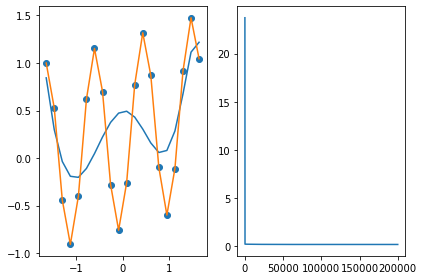

In [178]:
X_feature, weight_GD,losses = PolyCurveFit(X,y,10,alpha = 0.2,iteration=200000,showloss=True)
mypredictions = predict(X_feature, weight_GD)
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(X_feature[:, 1], mypredictions, label='predictions')
ax1.scatter(X_feature[:, 1], y)
ax1.plot(X_feature[:, 1], y)
ax2.plot([i for i in range(1,200001)], losses)

plt.tight_layout()
plt.show()
